# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [13]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

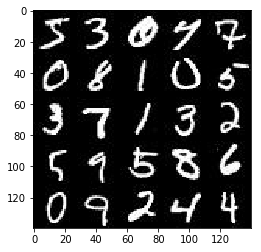

In [14]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

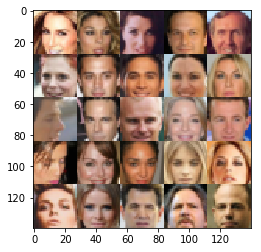

In [15]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [17]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate')
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [18]:
def discriminator(images, reuse=False, keep_prob=0.7):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
#     # TODO: Implement Function
#     # For reusability
#     kinit = tf.random_normal_initializer(stddev=0.02)
#     with tf.variable_scope('discriminator', reuse=reuse):
#         # 28x28x1 
#         # tf.contrib.layers.conv2d applies Xavier initializer by default 
#         x1 = tf.contrib.layers.conv2d(images, 64, 5, stride=2, padding= 'same')
# #         x1 = tf.nn.dropout(x1, keep_prob=keep_prob)
#         relu1 = tf.maximum(0.2 * x1, x1)
#         relu1 = tf.nn.dropout(relu1, keep_prob=keep_prob)
#         # 14x14x64
#         # applied  xavier initializer
#         # tf.contrib.layers.conv2d applies Xavier initializer by default 
#         x2 = tf.contrib.layers.conv2d(x1, 128, 5, stride=2, padding= 'same')
#         bn2 = tf.layers.batch_normalization(x2, training=True)
# #         bn2 = tf.nn.dropout(bn2, keep_prob=keep_prob)
#         relu2 = tf.maximum(bn2 * 0.2, bn2)
#         relu2 = tf.nn.dropout(relu2, keep_prob=keep_prob)
#         # 7x7x128
#         # tf.contrib.layers.conv2d applies Xavier initializer by default 
#         x3 = tf.contrib.layers.conv2d(x2, 265, 5, stride=2, padding= 'same')
#         bn3 = tf.layers.batch_normalization(x3, training=True)
# #         bn3 = tf.nn.dropout(bn3, keep_prob=keep_prob)
#         relu3 = tf.maximum(bn3 * 0.2, bn3)
#         relu3 = tf.nn.dropout(relu3, keep_prob=keep_prob)
#         # 4x4x256
#         flat = tf.reshape(relu3, (-1, 4*4*256))
#         logits = tf.layers.dense(flat, 1)
#         out = tf.sigmoid(logits)
        
#         return out, logits

    # TODO: Implement Function
    # For reusability
    with tf.variable_scope('discriminator', reuse=reuse):
        # 28x28x1 
        x1 = tf.contrib.layers.conv2d(images, 64, 5, stride=2, padding= 'same')
        relu1 = tf.maximum(0.2 * x1, x1)
        relu1 = tf.nn.dropout(relu1, keep_prob=keep_prob)
        # 14x14x64
        x2 = tf.contrib.layers.conv2d(relu1, 128, 5, stride=2, padding= 'same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(bn2 * 0.2, bn2)
        relu2 = tf.nn.dropout(relu2, keep_prob=keep_prob)
        # 7x7x128
        x3 = tf.contrib.layers.conv2d(relu2, 256, 5, stride=2, padding= 'same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(bn3 * 0.2, bn3)
        relu3 = tf.nn.dropout(relu3, keep_prob=keep_prob)
        # 4x4x256
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [27]:
def generator(z, out_channel_dim, is_train=True, keep_prob=0.7):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    # For reusability
    reuse = not is_train
    num_dims = 512
    stddev = 0.02
    with tf.variable_scope('generator', reuse= reuse):
        # Fully connected layer
        x1 = tf.layers.dense(z, 4*4*num_dims)
        # Reshape
        x1 = tf.reshape(x1, (-1, 4, 4, num_dims))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(x1 * 0.2, x1)
#         x1 = tf.nn.dropout(x1, keep_prob)
        # 4x4x512
        
        
        # 4 x 4
        # 7 = 4 * s
        #out_height = ceil(float(in_height) / float(strides[1]))
        #out_width = ceil(float(in_width) / float(strides[2]))
        
        #out_height = ceil(float(in_height * float(strides[1]) + filter_height - 1 / float(strides[1]))  = (7 * 2 + 5 - 1) = 18
        #out_width  = ceil(float(in_width * float(strides[2]) + filter_width - 1 / float(strides[2])))    = (7 * 2 + 5 - 1) = 18
        
        # Convolution 1
        k_init1 = tf.random_normal_initializer(stddev= stddev)
        x2 = tf.layers.conv2d_transpose(x1, int(num_dims/2), 4, strides=1, padding='valid',
                                        kernel_initializer= k_init1)
#         x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
#         x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
#         x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        # 7x7s256
        

        
        # Convolution 2
        k_init2 = tf.random_normal_initializer(stddev= stddev)
        x3 = tf.layers.conv2d_transpose(x2, int(num_dims/4), 5, strides=2, padding= 'same', kernel_initializer=k_init2)
#         x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(0.2 * x3, x3)
#         x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        # 14x14x128
        
        k_init3 = tf.random_normal_initializer(stddev= stddev)
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding= 'same', kernel_initializer= k_init3)
        # 28x28xout_channel_dim
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [28]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # applied smoothing
    smooth = 0
    
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=(tf.ones_like(d_model_real) * (1 - smooth))))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake))) 
    
    g_loss =  tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    
    return d_loss_real + d_loss_fake, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [29]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    # Optimization
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_op


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [30]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [31]:
class MY_GAN:
    def __init__(self, real_size, z_size, learning_rate, beta1= 0.5):
#         tf.reset_default_graph()
        print(real_size[1])
        print(real_size[2])
        print(real_size[3])
        self.input_real, self.input_z, self.learning_rate = model_inputs(real_size[1],
                                                     real_size[2],
                                                     real_size[3],
                                                     z_size)
        self.d_loss, self.g_loss = model_loss(self.input_real,
                                              self.input_z,
                                              real_size[3])
        self.d_opt, self.g_opt = model_opt(self.d_loss,
                                           self.g_loss,
                                           learning_rate,
                                           beta1)
        
losses = []

In [32]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # Main vars
#     saver = tf.train.Saver()
#     sample_z = np.random.uniform(-1, 1, size=(72, z_size))

#     losses = []
    steps = 0
    global losses
    losses = []
    print(data_shape)
    my_net = MY_GAN(data_shape, z_dim, learning_rate, beta1 = beta1)
    
    with tf.Session() as sess:

        sess.run(tf.global_variables_initializer())
        for e in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                #rescale batch images to -1, 1
                batch_images = batch_images * 2
                # TODO: Train Model
                steps += 1
                
                # Make random noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # optimizer
                _ = sess.run(my_net.d_opt, feed_dict = {my_net.input_real: batch_images, my_net.input_z: batch_z})
                _ = sess.run(my_net.g_opt, feed_dict={my_net.input_z: batch_z, my_net.input_real: batch_images})
#                 _ = sess.run(my_net.g_opt, feed_dict={my_net.input_z: batch_z, my_net.input_real: batch_images})
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = my_net.d_loss.eval({my_net.input_z: batch_z, my_net.input_real: batch_images})
                    train_loss_g = my_net.g_loss.eval({my_net.input_z: batch_z})

                    print("Epoch {}/{}...".format(e+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    generator_sample = show_generator_output(sess,
                                                             n_images = 30,
                                                             input_z = my_net.input_z,
                                                             out_channel_dim = data_shape[3],
                                                             image_mode = data_image_mode)
#                     gen_samples = sess.run(
#                                    generator(my_net.input_z, 3, is_train=False),
#                                    feed_dict={my_net.input_z: sample_z})
# #                     _ = view_samples(-1, samples, 6, 12, figsize=figsize)
#                     plt.show()
        
#         saver.save(sess, './checkpoints/generator.ckpt')
#     with open('samples.pkl', 'wb') as f:
#         pkl.dump(samples, f)

                
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
28
28
1
Epoch 1/2... Discriminator Loss: 2.5699... Generator Loss: 0.3578
Epoch 1/2... Discriminator Loss: 3.8554... Generator Loss: 0.0491
Epoch 1/2... Discriminator Loss: 1.4992... Generator Loss: 9.5470
Epoch 1/2... Discriminator Loss: 0.4521... Generator Loss: 1.7414
Epoch 1/2... Discriminator Loss: 1.2689... Generator Loss: 0.6958
Epoch 1/2... Discriminator Loss: 0.9384... Generator Loss: 2.9350
Epoch 1/2... Discriminator Loss: 2.1226... Generator Loss: 0.6015
Epoch 1/2... Discriminator Loss: 1.1543... Generator Loss: 1.0881
Epoch 1/2... Discriminator Loss: 0.9388... Generator Loss: 1.0228
Epoch 1/2... Discriminator Loss: 1.2588... Generator Loss: 0.9352


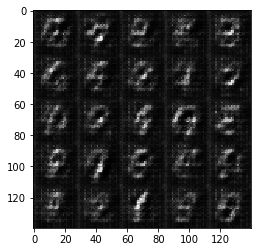

Epoch 1/2... Discriminator Loss: 1.1124... Generator Loss: 0.6251
Epoch 1/2... Discriminator Loss: 0.9852... Generator Loss: 1.4872
Epoch 1/2... Discriminator Loss: 0.9990... Generator Loss: 1.1015
Epoch 1/2... Discriminator Loss: 1.3419... Generator Loss: 1.5231
Epoch 1/2... Discriminator Loss: 2.1465... Generator Loss: 0.3492
Epoch 1/2... Discriminator Loss: 1.2611... Generator Loss: 1.0317
Epoch 1/2... Discriminator Loss: 1.3899... Generator Loss: 1.6219
Epoch 1/2... Discriminator Loss: 1.0731... Generator Loss: 2.1431
Epoch 1/2... Discriminator Loss: 0.9919... Generator Loss: 0.9681
Epoch 1/2... Discriminator Loss: 1.5183... Generator Loss: 0.6415


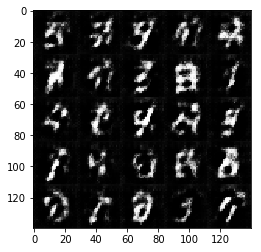

Epoch 1/2... Discriminator Loss: 1.1403... Generator Loss: 2.1484
Epoch 1/2... Discriminator Loss: 1.0697... Generator Loss: 1.0009
Epoch 1/2... Discriminator Loss: 1.1962... Generator Loss: 0.9324
Epoch 1/2... Discriminator Loss: 1.1683... Generator Loss: 1.1761
Epoch 1/2... Discriminator Loss: 1.0448... Generator Loss: 1.5448
Epoch 1/2... Discriminator Loss: 1.1484... Generator Loss: 0.7499
Epoch 1/2... Discriminator Loss: 1.4439... Generator Loss: 1.5825
Epoch 1/2... Discriminator Loss: 0.8722... Generator Loss: 1.5392
Epoch 1/2... Discriminator Loss: 2.3885... Generator Loss: 0.2299
Epoch 1/2... Discriminator Loss: 1.9826... Generator Loss: 0.3376


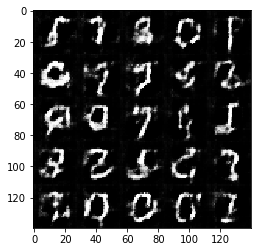

Epoch 1/2... Discriminator Loss: 1.2443... Generator Loss: 0.7728
Epoch 1/2... Discriminator Loss: 1.3262... Generator Loss: 1.0008
Epoch 1/2... Discriminator Loss: 1.3641... Generator Loss: 0.7472
Epoch 1/2... Discriminator Loss: 1.3205... Generator Loss: 1.1401
Epoch 1/2... Discriminator Loss: 1.3312... Generator Loss: 0.4825
Epoch 1/2... Discriminator Loss: 1.2950... Generator Loss: 0.9615
Epoch 1/2... Discriminator Loss: 1.2998... Generator Loss: 1.1081
Epoch 1/2... Discriminator Loss: 1.1337... Generator Loss: 0.6662
Epoch 1/2... Discriminator Loss: 1.1669... Generator Loss: 0.8867
Epoch 1/2... Discriminator Loss: 1.8991... Generator Loss: 0.4715


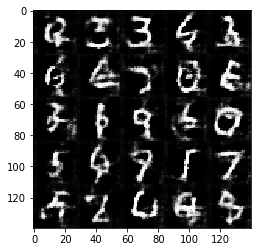

Epoch 1/2... Discriminator Loss: 1.6353... Generator Loss: 0.3305
Epoch 1/2... Discriminator Loss: 1.1328... Generator Loss: 0.6644
Epoch 1/2... Discriminator Loss: 1.3426... Generator Loss: 1.3220
Epoch 1/2... Discriminator Loss: 1.4523... Generator Loss: 0.6501
Epoch 1/2... Discriminator Loss: 0.8895... Generator Loss: 1.0286
Epoch 1/2... Discriminator Loss: 1.3854... Generator Loss: 0.9812
Epoch 1/2... Discriminator Loss: 1.0941... Generator Loss: 0.8108
Epoch 1/2... Discriminator Loss: 0.9733... Generator Loss: 1.6847
Epoch 1/2... Discriminator Loss: 1.7421... Generator Loss: 0.6355
Epoch 1/2... Discriminator Loss: 1.3931... Generator Loss: 0.3850


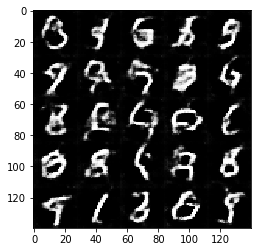

Epoch 1/2... Discriminator Loss: 1.1645... Generator Loss: 0.7590
Epoch 1/2... Discriminator Loss: 0.9555... Generator Loss: 1.7851
Epoch 1/2... Discriminator Loss: 1.7385... Generator Loss: 0.5914
Epoch 1/2... Discriminator Loss: 1.5992... Generator Loss: 0.5359
Epoch 1/2... Discriminator Loss: 0.8887... Generator Loss: 1.7332
Epoch 1/2... Discriminator Loss: 1.3196... Generator Loss: 0.9621
Epoch 1/2... Discriminator Loss: 1.4974... Generator Loss: 0.6285
Epoch 1/2... Discriminator Loss: 1.3582... Generator Loss: 0.6853
Epoch 1/2... Discriminator Loss: 0.9609... Generator Loss: 1.4768
Epoch 1/2... Discriminator Loss: 1.3419... Generator Loss: 0.5473


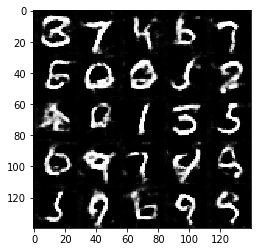

Epoch 1/2... Discriminator Loss: 1.3758... Generator Loss: 1.6196
Epoch 1/2... Discriminator Loss: 1.6543... Generator Loss: 0.6306
Epoch 1/2... Discriminator Loss: 0.9795... Generator Loss: 1.7216
Epoch 1/2... Discriminator Loss: 1.1348... Generator Loss: 0.6848
Epoch 1/2... Discriminator Loss: 1.2337... Generator Loss: 0.8225
Epoch 1/2... Discriminator Loss: 1.1270... Generator Loss: 2.2631
Epoch 1/2... Discriminator Loss: 1.3798... Generator Loss: 0.8802
Epoch 1/2... Discriminator Loss: 1.7704... Generator Loss: 0.4237
Epoch 1/2... Discriminator Loss: 1.8431... Generator Loss: 0.4689
Epoch 1/2... Discriminator Loss: 0.7818... Generator Loss: 1.8292


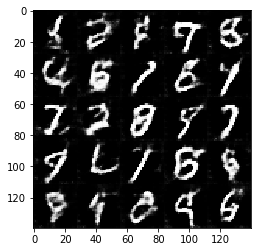

Epoch 1/2... Discriminator Loss: 1.7282... Generator Loss: 0.4293
Epoch 1/2... Discriminator Loss: 1.4722... Generator Loss: 0.8325
Epoch 1/2... Discriminator Loss: 0.9726... Generator Loss: 0.5833
Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 1.3155
Epoch 1/2... Discriminator Loss: 1.5805... Generator Loss: 0.5966
Epoch 1/2... Discriminator Loss: 0.8715... Generator Loss: 1.4327
Epoch 1/2... Discriminator Loss: 1.3040... Generator Loss: 0.7453
Epoch 1/2... Discriminator Loss: 0.8552... Generator Loss: 1.5371
Epoch 1/2... Discriminator Loss: 0.8924... Generator Loss: 1.9409
Epoch 1/2... Discriminator Loss: 2.3112... Generator Loss: 0.3507


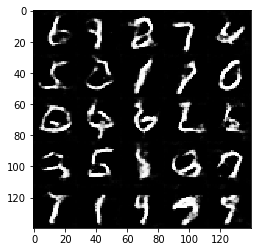

Epoch 1/2... Discriminator Loss: 0.5754... Generator Loss: 1.0143
Epoch 1/2... Discriminator Loss: 1.5591... Generator Loss: 0.7295
Epoch 1/2... Discriminator Loss: 0.9542... Generator Loss: 0.7869
Epoch 1/2... Discriminator Loss: 0.5962... Generator Loss: 1.1801
Epoch 1/2... Discriminator Loss: 1.0333... Generator Loss: 0.9750
Epoch 1/2... Discriminator Loss: 0.9853... Generator Loss: 1.2539
Epoch 1/2... Discriminator Loss: 1.6369... Generator Loss: 0.3640
Epoch 1/2... Discriminator Loss: 1.4675... Generator Loss: 0.5537
Epoch 1/2... Discriminator Loss: 1.3102... Generator Loss: 0.9169
Epoch 1/2... Discriminator Loss: 1.2704... Generator Loss: 0.7826


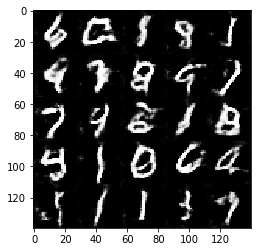

Epoch 1/2... Discriminator Loss: 1.5182... Generator Loss: 0.7196
Epoch 1/2... Discriminator Loss: 1.1710... Generator Loss: 1.0653
Epoch 1/2... Discriminator Loss: 1.3175... Generator Loss: 0.4875
Epoch 1/2... Discriminator Loss: 1.3742... Generator Loss: 0.7034
Epoch 1/2... Discriminator Loss: 0.9353... Generator Loss: 1.2084
Epoch 1/2... Discriminator Loss: 0.8766... Generator Loss: 0.9237
Epoch 1/2... Discriminator Loss: 1.1470... Generator Loss: 0.7588
Epoch 1/2... Discriminator Loss: 0.8918... Generator Loss: 0.9585
Epoch 1/2... Discriminator Loss: 1.3540... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 1.0260... Generator Loss: 0.9326


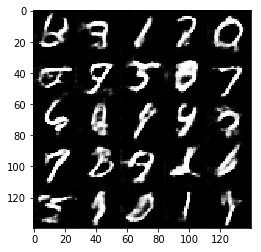

Epoch 1/2... Discriminator Loss: 1.0129... Generator Loss: 0.7317
Epoch 1/2... Discriminator Loss: 1.5671... Generator Loss: 0.9852
Epoch 1/2... Discriminator Loss: 1.4773... Generator Loss: 0.4750
Epoch 1/2... Discriminator Loss: 0.7296... Generator Loss: 2.0195
Epoch 1/2... Discriminator Loss: 1.5135... Generator Loss: 0.6885
Epoch 1/2... Discriminator Loss: 1.3583... Generator Loss: 0.8441
Epoch 1/2... Discriminator Loss: 0.8964... Generator Loss: 0.9635
Epoch 1/2... Discriminator Loss: 1.3189... Generator Loss: 0.7557
Epoch 1/2... Discriminator Loss: 1.8337... Generator Loss: 0.3606
Epoch 1/2... Discriminator Loss: 1.1241... Generator Loss: 1.0779


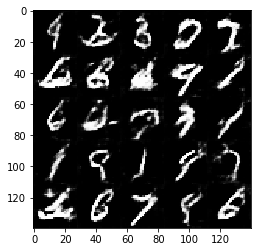

Epoch 1/2... Discriminator Loss: 1.1691... Generator Loss: 0.9885
Epoch 1/2... Discriminator Loss: 0.9839... Generator Loss: 1.4992
Epoch 1/2... Discriminator Loss: 0.7622... Generator Loss: 1.1687
Epoch 1/2... Discriminator Loss: 1.1356... Generator Loss: 1.3683
Epoch 1/2... Discriminator Loss: 1.8780... Generator Loss: 0.4189
Epoch 1/2... Discriminator Loss: 1.0881... Generator Loss: 0.6920
Epoch 1/2... Discriminator Loss: 1.3173... Generator Loss: 0.7458
Epoch 1/2... Discriminator Loss: 0.6604... Generator Loss: 1.8571
Epoch 1/2... Discriminator Loss: 0.6940... Generator Loss: 1.5693
Epoch 1/2... Discriminator Loss: 0.7309... Generator Loss: 1.2369


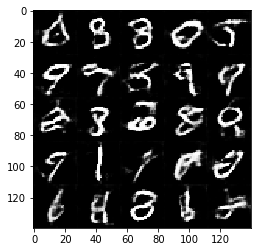

Epoch 1/2... Discriminator Loss: 0.8040... Generator Loss: 0.6591
Epoch 1/2... Discriminator Loss: 1.5983... Generator Loss: 0.5657
Epoch 1/2... Discriminator Loss: 1.1966... Generator Loss: 0.5442
Epoch 1/2... Discriminator Loss: 1.7139... Generator Loss: 0.4233
Epoch 1/2... Discriminator Loss: 0.7942... Generator Loss: 1.3852
Epoch 1/2... Discriminator Loss: 1.2244... Generator Loss: 0.7958
Epoch 1/2... Discriminator Loss: 1.3097... Generator Loss: 0.7556
Epoch 1/2... Discriminator Loss: 0.7250... Generator Loss: 1.8462
Epoch 1/2... Discriminator Loss: 0.6790... Generator Loss: 1.9488
Epoch 1/2... Discriminator Loss: 1.7464... Generator Loss: 0.6054


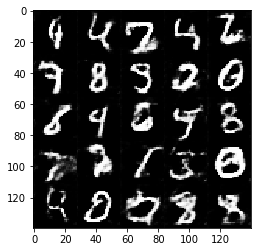

Epoch 1/2... Discriminator Loss: 1.5243... Generator Loss: 0.1867
Epoch 1/2... Discriminator Loss: 1.3998... Generator Loss: 0.8654
Epoch 1/2... Discriminator Loss: 1.1987... Generator Loss: 0.7754
Epoch 1/2... Discriminator Loss: 0.7170... Generator Loss: 1.5624
Epoch 1/2... Discriminator Loss: 0.7083... Generator Loss: 1.0829
Epoch 1/2... Discriminator Loss: 1.0875... Generator Loss: 0.7943
Epoch 1/2... Discriminator Loss: 2.3608... Generator Loss: 0.4580
Epoch 1/2... Discriminator Loss: 1.2512... Generator Loss: 2.8766
Epoch 1/2... Discriminator Loss: 0.6219... Generator Loss: 1.7844
Epoch 1/2... Discriminator Loss: 1.1775... Generator Loss: 1.3289


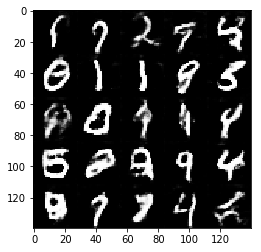

Epoch 1/2... Discriminator Loss: 0.7764... Generator Loss: 1.4497
Epoch 1/2... Discriminator Loss: 1.1353... Generator Loss: 3.1543
Epoch 1/2... Discriminator Loss: 0.9853... Generator Loss: 1.9239
Epoch 1/2... Discriminator Loss: 1.2264... Generator Loss: 0.4843
Epoch 1/2... Discriminator Loss: 1.7490... Generator Loss: 0.5484
Epoch 1/2... Discriminator Loss: 0.9595... Generator Loss: 0.6647
Epoch 1/2... Discriminator Loss: 2.1064... Generator Loss: 0.4602
Epoch 1/2... Discriminator Loss: 0.7214... Generator Loss: 1.3252
Epoch 1/2... Discriminator Loss: 1.8676... Generator Loss: 0.4223
Epoch 1/2... Discriminator Loss: 1.3818... Generator Loss: 0.9983


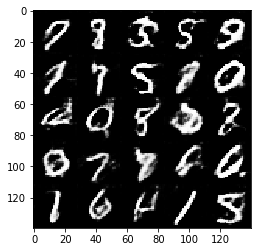

Epoch 1/2... Discriminator Loss: 2.0697... Generator Loss: 0.4262
Epoch 1/2... Discriminator Loss: 1.1246... Generator Loss: 1.0880
Epoch 1/2... Discriminator Loss: 1.1126... Generator Loss: 0.8190
Epoch 1/2... Discriminator Loss: 0.8897... Generator Loss: 1.2013
Epoch 1/2... Discriminator Loss: 1.0665... Generator Loss: 1.1339
Epoch 1/2... Discriminator Loss: 1.2549... Generator Loss: 0.6404
Epoch 1/2... Discriminator Loss: 2.3288... Generator Loss: 0.3764
Epoch 1/2... Discriminator Loss: 1.2325... Generator Loss: 0.6982
Epoch 1/2... Discriminator Loss: 1.5269... Generator Loss: 1.2348
Epoch 1/2... Discriminator Loss: 1.5693... Generator Loss: 0.4416


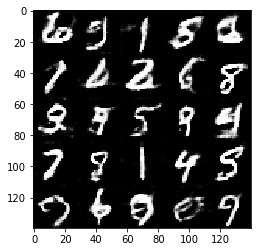

Epoch 1/2... Discriminator Loss: 1.1034... Generator Loss: 0.6548
Epoch 1/2... Discriminator Loss: 0.9786... Generator Loss: 1.5661
Epoch 1/2... Discriminator Loss: 0.7628... Generator Loss: 1.2496
Epoch 1/2... Discriminator Loss: 1.2462... Generator Loss: 1.2984
Epoch 1/2... Discriminator Loss: 0.6284... Generator Loss: 1.6968
Epoch 1/2... Discriminator Loss: 1.1204... Generator Loss: 1.1431
Epoch 1/2... Discriminator Loss: 1.0780... Generator Loss: 0.3873
Epoch 1/2... Discriminator Loss: 0.4818... Generator Loss: 2.3140
Epoch 1/2... Discriminator Loss: 0.6850... Generator Loss: 1.9001
Epoch 1/2... Discriminator Loss: 0.7092... Generator Loss: 0.7247


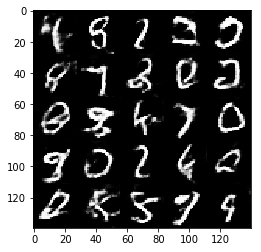

Epoch 1/2... Discriminator Loss: 0.9797... Generator Loss: 0.8502
Epoch 1/2... Discriminator Loss: 0.6998... Generator Loss: 1.2895
Epoch 1/2... Discriminator Loss: 1.9173... Generator Loss: 0.4279
Epoch 1/2... Discriminator Loss: 0.7480... Generator Loss: 1.7191
Epoch 1/2... Discriminator Loss: 0.7622... Generator Loss: 1.2825
Epoch 1/2... Discriminator Loss: 1.2286... Generator Loss: 0.5967
Epoch 1/2... Discriminator Loss: 1.0294... Generator Loss: 1.0659
Epoch 1/2... Discriminator Loss: 0.7450... Generator Loss: 1.5440
Epoch 1/2... Discriminator Loss: 1.2572... Generator Loss: 0.8504
Epoch 1/2... Discriminator Loss: 0.7593... Generator Loss: 1.8144


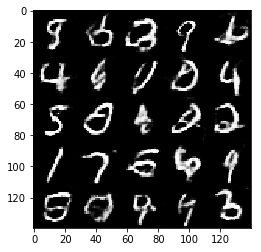

Epoch 1/2... Discriminator Loss: 1.8861... Generator Loss: 0.4174
Epoch 1/2... Discriminator Loss: 0.8013... Generator Loss: 1.2165
Epoch 1/2... Discriminator Loss: 1.1164... Generator Loss: 1.0738
Epoch 1/2... Discriminator Loss: 1.4678... Generator Loss: 0.5132
Epoch 1/2... Discriminator Loss: 1.0851... Generator Loss: 1.0027
Epoch 1/2... Discriminator Loss: 1.4767... Generator Loss: 1.4277
Epoch 1/2... Discriminator Loss: 0.8842... Generator Loss: 1.1794
Epoch 2/2... Discriminator Loss: 0.3878... Generator Loss: 2.3735
Epoch 2/2... Discriminator Loss: 0.4573... Generator Loss: 1.2022
Epoch 2/2... Discriminator Loss: 1.1026... Generator Loss: 1.5318


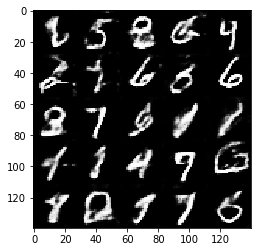

Epoch 2/2... Discriminator Loss: 0.7225... Generator Loss: 1.6314
Epoch 2/2... Discriminator Loss: 1.4973... Generator Loss: 0.9509
Epoch 2/2... Discriminator Loss: 1.8253... Generator Loss: 0.3568
Epoch 2/2... Discriminator Loss: 1.2586... Generator Loss: 0.9559
Epoch 2/2... Discriminator Loss: 1.1379... Generator Loss: 1.8557
Epoch 2/2... Discriminator Loss: 1.4357... Generator Loss: 0.9028
Epoch 2/2... Discriminator Loss: 0.8726... Generator Loss: 1.6413
Epoch 2/2... Discriminator Loss: 0.7522... Generator Loss: 1.0364
Epoch 2/2... Discriminator Loss: 0.5101... Generator Loss: 2.4071
Epoch 2/2... Discriminator Loss: 0.2647... Generator Loss: 1.8763


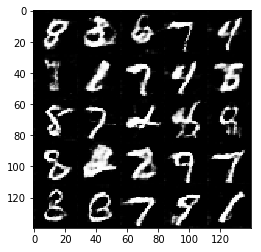

Epoch 2/2... Discriminator Loss: 1.2611... Generator Loss: 0.4740
Epoch 2/2... Discriminator Loss: 0.8072... Generator Loss: 1.0193
Epoch 2/2... Discriminator Loss: 0.8151... Generator Loss: 0.9155
Epoch 2/2... Discriminator Loss: 0.8579... Generator Loss: 1.2445
Epoch 2/2... Discriminator Loss: 1.0013... Generator Loss: 1.0731
Epoch 2/2... Discriminator Loss: 0.5246... Generator Loss: 2.0597
Epoch 2/2... Discriminator Loss: 1.1733... Generator Loss: 1.0907
Epoch 2/2... Discriminator Loss: 1.6299... Generator Loss: 0.5786
Epoch 2/2... Discriminator Loss: 0.6568... Generator Loss: 1.2922
Epoch 2/2... Discriminator Loss: 1.7904... Generator Loss: 0.3981


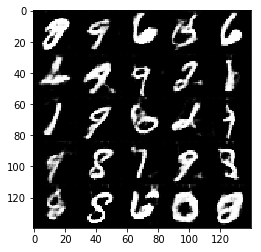

Epoch 2/2... Discriminator Loss: 1.2030... Generator Loss: 0.9803
Epoch 2/2... Discriminator Loss: 1.1201... Generator Loss: 1.1548
Epoch 2/2... Discriminator Loss: 0.9664... Generator Loss: 1.2802
Epoch 2/2... Discriminator Loss: 1.1354... Generator Loss: 0.9680
Epoch 2/2... Discriminator Loss: 0.9096... Generator Loss: 1.6055
Epoch 2/2... Discriminator Loss: 1.7058... Generator Loss: 0.4974
Epoch 2/2... Discriminator Loss: 0.4380... Generator Loss: 1.6721
Epoch 2/2... Discriminator Loss: 0.4713... Generator Loss: 3.9991
Epoch 2/2... Discriminator Loss: 0.3922... Generator Loss: 2.1663
Epoch 2/2... Discriminator Loss: 0.8853... Generator Loss: 1.2273


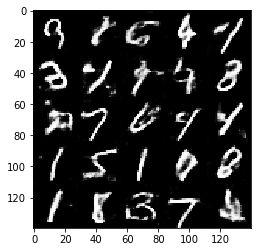

Epoch 2/2... Discriminator Loss: 0.6374... Generator Loss: 1.3499
Epoch 2/2... Discriminator Loss: 0.4064... Generator Loss: 4.2081
Epoch 2/2... Discriminator Loss: 0.6050... Generator Loss: 2.5208
Epoch 2/2... Discriminator Loss: 0.7870... Generator Loss: 1.5300
Epoch 2/2... Discriminator Loss: 1.0098... Generator Loss: 1.0444
Epoch 2/2... Discriminator Loss: 1.3564... Generator Loss: 1.0889
Epoch 2/2... Discriminator Loss: 1.0102... Generator Loss: 1.8471
Epoch 2/2... Discriminator Loss: 0.3323... Generator Loss: 1.4783
Epoch 2/2... Discriminator Loss: 0.6619... Generator Loss: 2.8878
Epoch 2/2... Discriminator Loss: 0.3681... Generator Loss: 1.6078


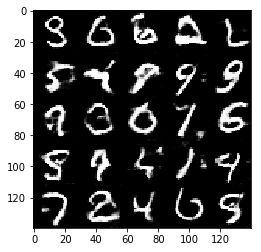

Epoch 2/2... Discriminator Loss: 2.1417... Generator Loss: 4.3507
Epoch 2/2... Discriminator Loss: 1.2975... Generator Loss: 0.5863
Epoch 2/2... Discriminator Loss: 0.6020... Generator Loss: 1.4835
Epoch 2/2... Discriminator Loss: 1.1195... Generator Loss: 1.3683
Epoch 2/2... Discriminator Loss: 0.6520... Generator Loss: 2.6401
Epoch 2/2... Discriminator Loss: 1.2128... Generator Loss: 1.2176
Epoch 2/2... Discriminator Loss: 0.4335... Generator Loss: 1.4510
Epoch 2/2... Discriminator Loss: 1.2126... Generator Loss: 0.8473
Epoch 2/2... Discriminator Loss: 0.3461... Generator Loss: 1.7700
Epoch 2/2... Discriminator Loss: 1.2008... Generator Loss: 1.8868


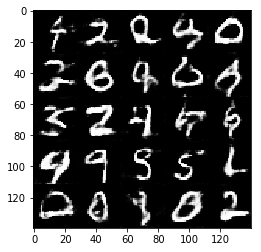

Epoch 2/2... Discriminator Loss: 1.3447... Generator Loss: 0.4501
Epoch 2/2... Discriminator Loss: 0.6610... Generator Loss: 1.2725
Epoch 2/2... Discriminator Loss: 1.2286... Generator Loss: 1.3001
Epoch 2/2... Discriminator Loss: 0.9909... Generator Loss: 1.0602
Epoch 2/2... Discriminator Loss: 1.1431... Generator Loss: 0.4314
Epoch 2/2... Discriminator Loss: 0.9995... Generator Loss: 0.9672
Epoch 2/2... Discriminator Loss: 0.5714... Generator Loss: 2.3523
Epoch 2/2... Discriminator Loss: 0.9001... Generator Loss: 1.3601
Epoch 2/2... Discriminator Loss: 1.0461... Generator Loss: 1.6134
Epoch 2/2... Discriminator Loss: 1.3341... Generator Loss: 3.5297


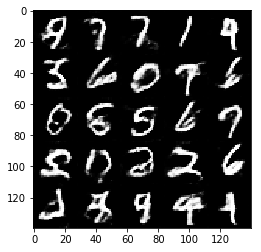

Epoch 2/2... Discriminator Loss: 1.0608... Generator Loss: 1.1993
Epoch 2/2... Discriminator Loss: 0.3453... Generator Loss: 3.9103
Epoch 2/2... Discriminator Loss: 0.8912... Generator Loss: 1.0670
Epoch 2/2... Discriminator Loss: 0.8850... Generator Loss: 1.0504
Epoch 2/2... Discriminator Loss: 0.7013... Generator Loss: 1.3541
Epoch 2/2... Discriminator Loss: 1.3415... Generator Loss: 0.4733
Epoch 2/2... Discriminator Loss: 1.2046... Generator Loss: 1.4674
Epoch 2/2... Discriminator Loss: 0.3844... Generator Loss: 2.1665
Epoch 2/2... Discriminator Loss: 1.6749... Generator Loss: 0.5449
Epoch 2/2... Discriminator Loss: 0.5355... Generator Loss: 1.1980


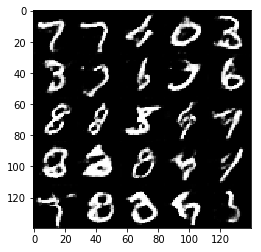

Epoch 2/2... Discriminator Loss: 1.1496... Generator Loss: 0.9128
Epoch 2/2... Discriminator Loss: 0.3512... Generator Loss: 1.6251
Epoch 2/2... Discriminator Loss: 1.1657... Generator Loss: 0.7668
Epoch 2/2... Discriminator Loss: 3.4448... Generator Loss: 0.1087
Epoch 2/2... Discriminator Loss: 0.7736... Generator Loss: 1.0602
Epoch 2/2... Discriminator Loss: 1.7721... Generator Loss: 0.5055
Epoch 2/2... Discriminator Loss: 1.2398... Generator Loss: 1.0249
Epoch 2/2... Discriminator Loss: 0.3339... Generator Loss: 1.8700
Epoch 2/2... Discriminator Loss: 1.1045... Generator Loss: 1.2759
Epoch 2/2... Discriminator Loss: 2.9340... Generator Loss: 0.2357


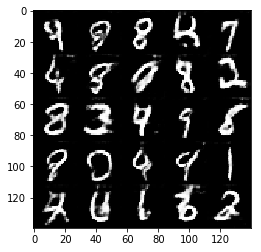

Epoch 2/2... Discriminator Loss: 0.7996... Generator Loss: 1.1462
Epoch 2/2... Discriminator Loss: 1.9341... Generator Loss: 0.4391
Epoch 2/2... Discriminator Loss: 1.6019... Generator Loss: 0.7066
Epoch 2/2... Discriminator Loss: 0.6014... Generator Loss: 2.0184
Epoch 2/2... Discriminator Loss: 1.0434... Generator Loss: 1.1139
Epoch 2/2... Discriminator Loss: 0.3531... Generator Loss: 1.3873
Epoch 2/2... Discriminator Loss: 0.4822... Generator Loss: 1.7757
Epoch 2/2... Discriminator Loss: 0.4715... Generator Loss: 2.8245
Epoch 2/2... Discriminator Loss: 0.7305... Generator Loss: 1.1804
Epoch 2/2... Discriminator Loss: 1.6056... Generator Loss: 0.6882


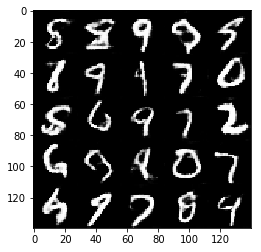

Epoch 2/2... Discriminator Loss: 2.7137... Generator Loss: 0.2590
Epoch 2/2... Discriminator Loss: 1.0943... Generator Loss: 1.1030
Epoch 2/2... Discriminator Loss: 0.7040... Generator Loss: 1.2737
Epoch 2/2... Discriminator Loss: 0.6521... Generator Loss: 1.4907
Epoch 2/2... Discriminator Loss: 1.8969... Generator Loss: 0.6504
Epoch 2/2... Discriminator Loss: 4.5981... Generator Loss: 0.0836
Epoch 2/2... Discriminator Loss: 0.7832... Generator Loss: 0.9748
Epoch 2/2... Discriminator Loss: 1.1421... Generator Loss: 0.3666
Epoch 2/2... Discriminator Loss: 1.2780... Generator Loss: 1.3263
Epoch 2/2... Discriminator Loss: 1.5767... Generator Loss: 0.8043


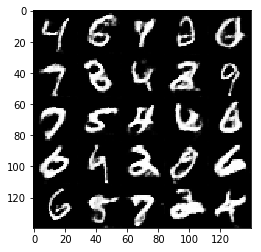

Epoch 2/2... Discriminator Loss: 1.6712... Generator Loss: 1.2843
Epoch 2/2... Discriminator Loss: 0.7855... Generator Loss: 1.1517
Epoch 2/2... Discriminator Loss: 0.2852... Generator Loss: 2.3939
Epoch 2/2... Discriminator Loss: 1.7451... Generator Loss: 0.6429
Epoch 2/2... Discriminator Loss: 0.6235... Generator Loss: 1.9432
Epoch 2/2... Discriminator Loss: 0.2935... Generator Loss: 1.9851
Epoch 2/2... Discriminator Loss: 1.1755... Generator Loss: 0.6626
Epoch 2/2... Discriminator Loss: 1.1505... Generator Loss: 0.9250
Epoch 2/2... Discriminator Loss: 0.8385... Generator Loss: 2.5750
Epoch 2/2... Discriminator Loss: 0.6416... Generator Loss: 1.8703


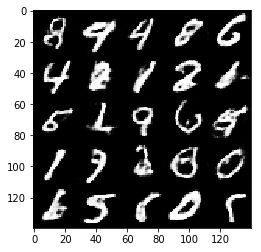

Epoch 2/2... Discriminator Loss: 2.3216... Generator Loss: 0.2608
Epoch 2/2... Discriminator Loss: 0.6732... Generator Loss: 1.2227
Epoch 2/2... Discriminator Loss: 0.4765... Generator Loss: 1.8454
Epoch 2/2... Discriminator Loss: 0.8195... Generator Loss: 1.4660
Epoch 2/2... Discriminator Loss: 1.2546... Generator Loss: 1.0606
Epoch 2/2... Discriminator Loss: 0.4302... Generator Loss: 0.7946
Epoch 2/2... Discriminator Loss: 0.8468... Generator Loss: 1.2056
Epoch 2/2... Discriminator Loss: 1.9699... Generator Loss: 0.3885
Epoch 2/2... Discriminator Loss: 3.5769... Generator Loss: 0.3505
Epoch 2/2... Discriminator Loss: 0.6318... Generator Loss: 0.7370


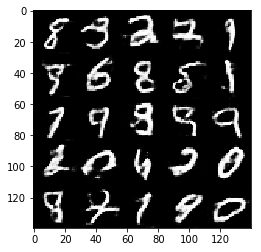

Epoch 2/2... Discriminator Loss: 0.4088... Generator Loss: 3.8836
Epoch 2/2... Discriminator Loss: 0.4921... Generator Loss: 2.4561
Epoch 2/2... Discriminator Loss: 2.1092... Generator Loss: 0.3877
Epoch 2/2... Discriminator Loss: 0.4944... Generator Loss: 4.3551
Epoch 2/2... Discriminator Loss: 0.8070... Generator Loss: 1.3233
Epoch 2/2... Discriminator Loss: 0.3570... Generator Loss: 2.9084
Epoch 2/2... Discriminator Loss: 2.8418... Generator Loss: 5.5191
Epoch 2/2... Discriminator Loss: 1.9817... Generator Loss: 0.4262
Epoch 2/2... Discriminator Loss: 0.7079... Generator Loss: 1.9437
Epoch 2/2... Discriminator Loss: 0.8999... Generator Loss: 2.0205


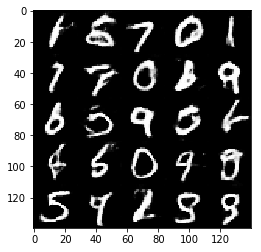

Epoch 2/2... Discriminator Loss: 0.7998... Generator Loss: 0.8761
Epoch 2/2... Discriminator Loss: 0.9451... Generator Loss: 0.7088
Epoch 2/2... Discriminator Loss: 3.3603... Generator Loss: 0.2087
Epoch 2/2... Discriminator Loss: 0.6112... Generator Loss: 1.1197
Epoch 2/2... Discriminator Loss: 1.0467... Generator Loss: 1.2309
Epoch 2/2... Discriminator Loss: 0.5483... Generator Loss: 1.9804
Epoch 2/2... Discriminator Loss: 0.5235... Generator Loss: 2.5863
Epoch 2/2... Discriminator Loss: 0.5755... Generator Loss: 3.2489
Epoch 2/2... Discriminator Loss: 0.8380... Generator Loss: 1.0534
Epoch 2/2... Discriminator Loss: 0.5719... Generator Loss: 0.4576


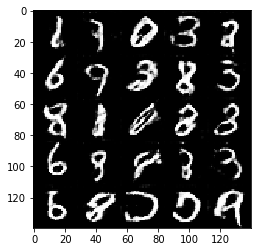

Epoch 2/2... Discriminator Loss: 1.5761... Generator Loss: 0.5133
Epoch 2/2... Discriminator Loss: 0.6591... Generator Loss: 1.6753
Epoch 2/2... Discriminator Loss: 0.5954... Generator Loss: 1.4172
Epoch 2/2... Discriminator Loss: 0.8068... Generator Loss: 1.1634
Epoch 2/2... Discriminator Loss: 0.5010... Generator Loss: 4.2617
Epoch 2/2... Discriminator Loss: 0.5315... Generator Loss: 1.5485
Epoch 2/2... Discriminator Loss: 1.4434... Generator Loss: 1.3480
Epoch 2/2... Discriminator Loss: 0.5001... Generator Loss: 1.7999
Epoch 2/2... Discriminator Loss: 1.3314... Generator Loss: 1.4039
Epoch 2/2... Discriminator Loss: 1.6220... Generator Loss: 0.4168


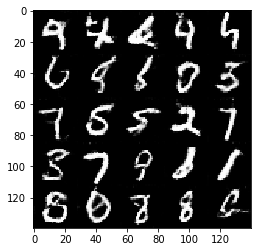

Epoch 2/2... Discriminator Loss: 2.1356... Generator Loss: 0.5363
Epoch 2/2... Discriminator Loss: 1.5732... Generator Loss: 0.7612
Epoch 2/2... Discriminator Loss: 1.0825... Generator Loss: 1.3509
Epoch 2/2... Discriminator Loss: 2.2798... Generator Loss: 0.6391
Epoch 2/2... Discriminator Loss: 1.4165... Generator Loss: 1.5256
Epoch 2/2... Discriminator Loss: 1.4652... Generator Loss: 5.1999
Epoch 2/2... Discriminator Loss: 0.5424... Generator Loss: 3.2505
Epoch 2/2... Discriminator Loss: 0.9851... Generator Loss: 0.9816
Epoch 2/2... Discriminator Loss: 0.8718... Generator Loss: 5.4845
Epoch 2/2... Discriminator Loss: 0.5192... Generator Loss: 1.1701


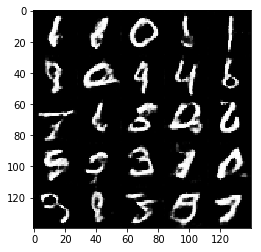

Epoch 2/2... Discriminator Loss: 1.1507... Generator Loss: 0.7036
Epoch 2/2... Discriminator Loss: 0.3935... Generator Loss: 3.3144
Epoch 2/2... Discriminator Loss: 0.8506... Generator Loss: 1.4322
Epoch 2/2... Discriminator Loss: 0.4228... Generator Loss: 2.4866
Epoch 2/2... Discriminator Loss: 0.7105... Generator Loss: 1.2788
Epoch 2/2... Discriminator Loss: 1.2018... Generator Loss: 0.6591
Epoch 2/2... Discriminator Loss: 0.8494... Generator Loss: 1.5420
Epoch 2/2... Discriminator Loss: 0.6597... Generator Loss: 1.4808
Epoch 2/2... Discriminator Loss: 2.9391... Generator Loss: 0.0541
Epoch 2/2... Discriminator Loss: 1.6386... Generator Loss: 0.6659


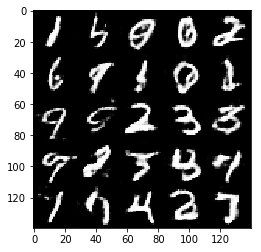

Epoch 2/2... Discriminator Loss: 1.0811... Generator Loss: 1.2556
Epoch 2/2... Discriminator Loss: 1.5129... Generator Loss: 0.3328
Epoch 2/2... Discriminator Loss: 1.7286... Generator Loss: 0.4339
Epoch 2/2... Discriminator Loss: 2.5958... Generator Loss: 0.4367
Epoch 2/2... Discriminator Loss: 0.5733... Generator Loss: 2.3885
Epoch 2/2... Discriminator Loss: 0.6517... Generator Loss: 1.9064
Epoch 2/2... Discriminator Loss: 0.3348... Generator Loss: 2.2455
Epoch 2/2... Discriminator Loss: 0.5517... Generator Loss: 2.0717
Epoch 2/2... Discriminator Loss: 0.9555... Generator Loss: 0.5702
Epoch 2/2... Discriminator Loss: 3.1784... Generator Loss: 0.3473


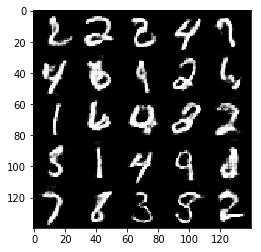

Epoch 2/2... Discriminator Loss: 0.7563... Generator Loss: 0.8058
Epoch 2/2... Discriminator Loss: 0.2725... Generator Loss: 2.1316
Epoch 2/2... Discriminator Loss: 0.9959... Generator Loss: 1.7716
Epoch 2/2... Discriminator Loss: 0.6716... Generator Loss: 1.0585
Epoch 2/2... Discriminator Loss: 0.3813... Generator Loss: 2.6836


In [33]:
batch_size = 32 #32
z_dim = 200 #150
learning_rate = 0.0005
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

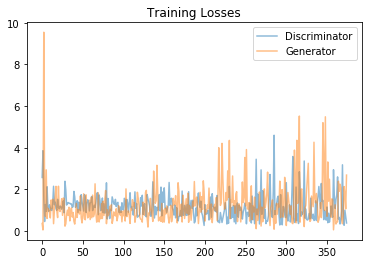

In [34]:
plt = pyplot
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
28
28
3
Epoch 1/1... Discriminator Loss: 0.3504... Generator Loss: 2.2117
Epoch 1/1... Discriminator Loss: 0.8134... Generator Loss: 13.5728
Epoch 1/1... Discriminator Loss: 0.8460... Generator Loss: 1.0944
Epoch 1/1... Discriminator Loss: 2.0256... Generator Loss: 14.9318
Epoch 1/1... Discriminator Loss: 0.3529... Generator Loss: 2.7952
Epoch 1/1... Discriminator Loss: 0.6962... Generator Loss: 8.6713
Epoch 1/1... Discriminator Loss: 1.9665... Generator Loss: 0.3643
Epoch 1/1... Discriminator Loss: 1.5507... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.8225... Generator Loss: 0.3054
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.6634


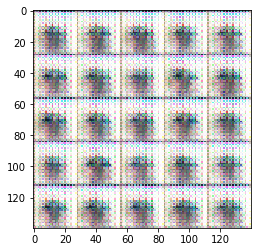

Epoch 1/1... Discriminator Loss: 0.0973... Generator Loss: 6.3018
Epoch 1/1... Discriminator Loss: 0.2543... Generator Loss: 1.9877
Epoch 1/1... Discriminator Loss: 0.1500... Generator Loss: 5.5337
Epoch 1/1... Discriminator Loss: 0.1852... Generator Loss: 5.4888
Epoch 1/1... Discriminator Loss: 0.0869... Generator Loss: 4.3398
Epoch 1/1... Discriminator Loss: 0.0914... Generator Loss: 4.9252
Epoch 1/1... Discriminator Loss: 0.2475... Generator Loss: 7.5829
Epoch 1/1... Discriminator Loss: 0.1254... Generator Loss: 2.7358
Epoch 1/1... Discriminator Loss: 0.1218... Generator Loss: 4.0735
Epoch 1/1... Discriminator Loss: 0.0756... Generator Loss: 3.8455


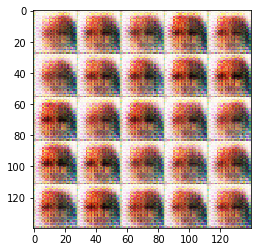

Epoch 1/1... Discriminator Loss: 0.0773... Generator Loss: 3.4003
Epoch 1/1... Discriminator Loss: 0.1431... Generator Loss: 2.9792
Epoch 1/1... Discriminator Loss: 0.3490... Generator Loss: 2.9824
Epoch 1/1... Discriminator Loss: 0.5930... Generator Loss: 4.2425
Epoch 1/1... Discriminator Loss: 0.5446... Generator Loss: 2.1815
Epoch 1/1... Discriminator Loss: 0.4814... Generator Loss: 2.0196
Epoch 1/1... Discriminator Loss: 0.7436... Generator Loss: 1.8284
Epoch 1/1... Discriminator Loss: 0.5198... Generator Loss: 1.9630
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 1.2415
Epoch 1/1... Discriminator Loss: 1.3190... Generator Loss: 1.0715


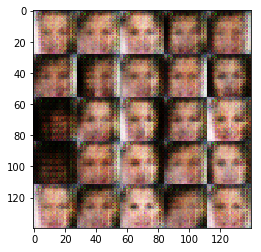

Epoch 1/1... Discriminator Loss: 2.4264... Generator Loss: 0.1415
Epoch 1/1... Discriminator Loss: 0.9753... Generator Loss: 1.1810
Epoch 1/1... Discriminator Loss: 1.0132... Generator Loss: 1.1743
Epoch 1/1... Discriminator Loss: 1.8343... Generator Loss: 0.4450
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 1.0094
Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 0.9037
Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 2.4140
Epoch 1/1... Discriminator Loss: 0.9032... Generator Loss: 3.4468
Epoch 1/1... Discriminator Loss: 1.5152... Generator Loss: 0.4688
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.8233


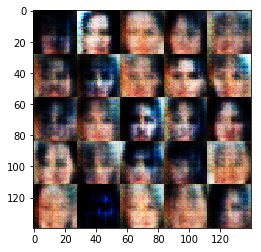

Epoch 1/1... Discriminator Loss: 1.6129... Generator Loss: 0.4528
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 1.5303
Epoch 1/1... Discriminator Loss: 1.0963... Generator Loss: 0.9013
Epoch 1/1... Discriminator Loss: 1.1656... Generator Loss: 0.6392
Epoch 1/1... Discriminator Loss: 1.1467... Generator Loss: 2.4383
Epoch 1/1... Discriminator Loss: 1.0332... Generator Loss: 1.1311
Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 1.3286
Epoch 1/1... Discriminator Loss: 1.1716... Generator Loss: 1.0554
Epoch 1/1... Discriminator Loss: 1.7659... Generator Loss: 0.3426
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 1.1931


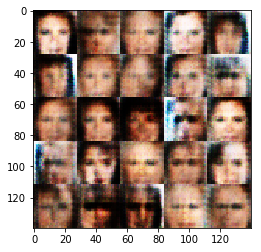

Epoch 1/1... Discriminator Loss: 0.7594... Generator Loss: 1.3126
Epoch 1/1... Discriminator Loss: 1.1204... Generator Loss: 1.0331
Epoch 1/1... Discriminator Loss: 1.0442... Generator Loss: 1.3405
Epoch 1/1... Discriminator Loss: 1.6085... Generator Loss: 0.4523
Epoch 1/1... Discriminator Loss: 1.9141... Generator Loss: 2.3304
Epoch 1/1... Discriminator Loss: 0.6671... Generator Loss: 1.5832
Epoch 1/1... Discriminator Loss: 2.0680... Generator Loss: 3.8485
Epoch 1/1... Discriminator Loss: 1.3916... Generator Loss: 0.6562
Epoch 1/1... Discriminator Loss: 1.6080... Generator Loss: 0.4774
Epoch 1/1... Discriminator Loss: 0.8228... Generator Loss: 1.7427


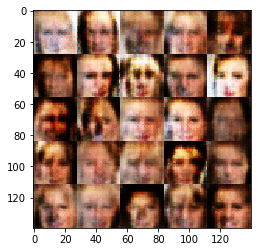

Epoch 1/1... Discriminator Loss: 1.2300... Generator Loss: 1.3071
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 1.8279
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.2345
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.5979
Epoch 1/1... Discriminator Loss: 0.7521... Generator Loss: 1.2767
Epoch 1/1... Discriminator Loss: 1.1721... Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.1356... Generator Loss: 1.7922
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 1.6541
Epoch 1/1... Discriminator Loss: 1.4918... Generator Loss: 0.3400
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 0.8112


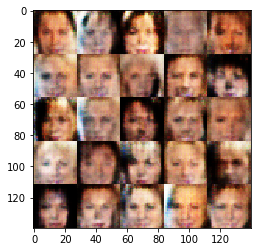

Epoch 1/1... Discriminator Loss: 1.1076... Generator Loss: 0.8743
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 0.8204
Epoch 1/1... Discriminator Loss: 1.0666... Generator Loss: 0.9707
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 0.9352... Generator Loss: 1.2092
Epoch 1/1... Discriminator Loss: 1.1042... Generator Loss: 1.4611
Epoch 1/1... Discriminator Loss: 1.8199... Generator Loss: 0.4213
Epoch 1/1... Discriminator Loss: 1.1424... Generator Loss: 1.7454
Epoch 1/1... Discriminator Loss: 0.7072... Generator Loss: 2.2642
Epoch 1/1... Discriminator Loss: 1.5065... Generator Loss: 0.5464


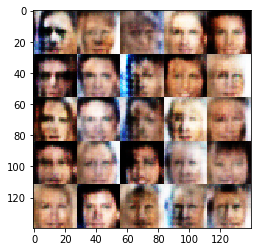

Epoch 1/1... Discriminator Loss: 1.7395... Generator Loss: 2.7073
Epoch 1/1... Discriminator Loss: 1.8639... Generator Loss: 0.5302
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 1.6320
Epoch 1/1... Discriminator Loss: 0.8152... Generator Loss: 1.2002
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.5328
Epoch 1/1... Discriminator Loss: 1.7072... Generator Loss: 0.4124
Epoch 1/1... Discriminator Loss: 1.4592... Generator Loss: 0.5135
Epoch 1/1... Discriminator Loss: 1.1262... Generator Loss: 1.2799
Epoch 1/1... Discriminator Loss: 1.0432... Generator Loss: 1.2873
Epoch 1/1... Discriminator Loss: 0.7234... Generator Loss: 1.6578


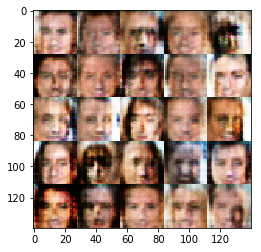

Epoch 1/1... Discriminator Loss: 3.0898... Generator Loss: 4.5101
Epoch 1/1... Discriminator Loss: 0.8307... Generator Loss: 0.8196
Epoch 1/1... Discriminator Loss: 1.7614... Generator Loss: 0.4758
Epoch 1/1... Discriminator Loss: 0.6628... Generator Loss: 1.5094
Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 0.8212
Epoch 1/1... Discriminator Loss: 1.5020... Generator Loss: 0.6092
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.4764
Epoch 1/1... Discriminator Loss: 0.5698... Generator Loss: 2.0760
Epoch 1/1... Discriminator Loss: 1.6805... Generator Loss: 0.3105
Epoch 1/1... Discriminator Loss: 1.1559... Generator Loss: 0.7012


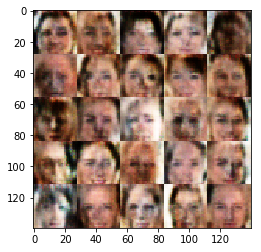

Epoch 1/1... Discriminator Loss: 0.7693... Generator Loss: 1.9730
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.8733
Epoch 1/1... Discriminator Loss: 1.1986... Generator Loss: 0.5788
Epoch 1/1... Discriminator Loss: 0.9332... Generator Loss: 1.0837
Epoch 1/1... Discriminator Loss: 1.0443... Generator Loss: 1.3035
Epoch 1/1... Discriminator Loss: 1.5400... Generator Loss: 0.5013
Epoch 1/1... Discriminator Loss: 0.8235... Generator Loss: 1.7070
Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 1.1759
Epoch 1/1... Discriminator Loss: 1.1030... Generator Loss: 0.8147


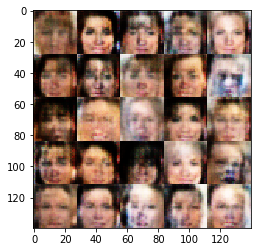

Epoch 1/1... Discriminator Loss: 0.9185... Generator Loss: 1.7205
Epoch 1/1... Discriminator Loss: 1.1603... Generator Loss: 1.0527
Epoch 1/1... Discriminator Loss: 1.9393... Generator Loss: 0.3364
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 2.1633
Epoch 1/1... Discriminator Loss: 1.6919... Generator Loss: 0.4167
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.7987
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 0.4938
Epoch 1/1... Discriminator Loss: 1.1775... Generator Loss: 1.5414
Epoch 1/1... Discriminator Loss: 1.6168... Generator Loss: 0.4332
Epoch 1/1... Discriminator Loss: 1.0582... Generator Loss: 0.7248


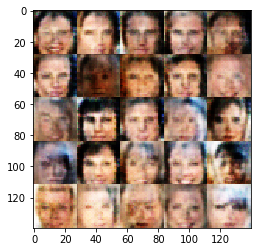

Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 1.0975
Epoch 1/1... Discriminator Loss: 1.1045... Generator Loss: 1.5485
Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.8382
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 1.6474
Epoch 1/1... Discriminator Loss: 1.4733... Generator Loss: 0.7182
Epoch 1/1... Discriminator Loss: 1.6921... Generator Loss: 0.4192
Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 1.0409
Epoch 1/1... Discriminator Loss: 1.4985... Generator Loss: 0.6048
Epoch 1/1... Discriminator Loss: 1.0634... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 1.3346


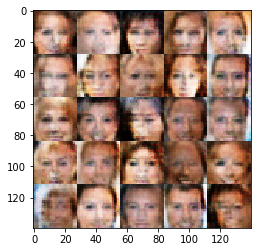

Epoch 1/1... Discriminator Loss: 1.1349... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 1.0007... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.0877... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 0.9769... Generator Loss: 1.3677
Epoch 1/1... Discriminator Loss: 0.8420... Generator Loss: 1.1706
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.8858
Epoch 1/1... Discriminator Loss: 0.8569... Generator Loss: 1.2482
Epoch 1/1... Discriminator Loss: 1.8032... Generator Loss: 0.3174
Epoch 1/1... Discriminator Loss: 1.8337... Generator Loss: 0.4947


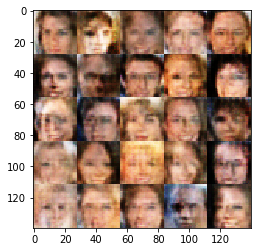

Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 0.7919... Generator Loss: 1.7356
Epoch 1/1... Discriminator Loss: 0.8346... Generator Loss: 1.4533
Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 0.9723
Epoch 1/1... Discriminator Loss: 1.2192... Generator Loss: 0.8401
Epoch 1/1... Discriminator Loss: 1.1584... Generator Loss: 1.4351
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.8353
Epoch 1/1... Discriminator Loss: 0.7945... Generator Loss: 1.2429
Epoch 1/1... Discriminator Loss: 1.1739... Generator Loss: 0.5450
Epoch 1/1... Discriminator Loss: 1.2524... Generator Loss: 0.6586


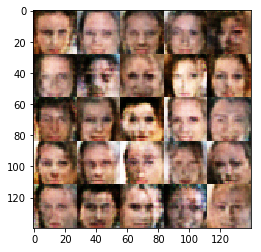

Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 0.9411
Epoch 1/1... Discriminator Loss: 0.9184... Generator Loss: 1.4057
Epoch 1/1... Discriminator Loss: 1.5151... Generator Loss: 0.5122
Epoch 1/1... Discriminator Loss: 1.1902... Generator Loss: 0.8073
Epoch 1/1... Discriminator Loss: 1.2177... Generator Loss: 1.7775
Epoch 1/1... Discriminator Loss: 1.5303... Generator Loss: 0.6526
Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.5707
Epoch 1/1... Discriminator Loss: 0.8938... Generator Loss: 1.3420
Epoch 1/1... Discriminator Loss: 1.5224... Generator Loss: 0.5295
Epoch 1/1... Discriminator Loss: 0.8670... Generator Loss: 1.5646


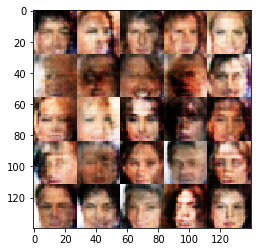

Epoch 1/1... Discriminator Loss: 1.5351... Generator Loss: 0.3927
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.6253
Epoch 1/1... Discriminator Loss: 0.9284... Generator Loss: 1.5400
Epoch 1/1... Discriminator Loss: 1.1156... Generator Loss: 0.9937
Epoch 1/1... Discriminator Loss: 0.9999... Generator Loss: 1.2802
Epoch 1/1... Discriminator Loss: 1.2402... Generator Loss: 0.9994
Epoch 1/1... Discriminator Loss: 1.4736... Generator Loss: 0.7799
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 0.6097
Epoch 1/1... Discriminator Loss: 1.0432... Generator Loss: 1.2732
Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 1.2311


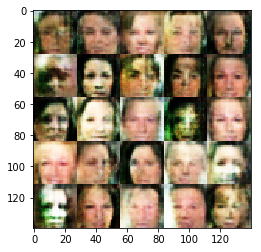

Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 1.4657
Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.9649
Epoch 1/1... Discriminator Loss: 0.7791... Generator Loss: 1.6037
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.6796
Epoch 1/1... Discriminator Loss: 1.1822... Generator Loss: 1.1556
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 1.6987
Epoch 1/1... Discriminator Loss: 1.2566... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.6185... Generator Loss: 0.8600
Epoch 1/1... Discriminator Loss: 0.9895... Generator Loss: 0.8393
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.9519


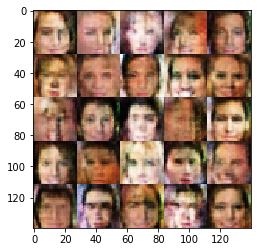

Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 0.6377
Epoch 1/1... Discriminator Loss: 0.8495... Generator Loss: 0.8255
Epoch 1/1... Discriminator Loss: 1.4517... Generator Loss: 0.6090
Epoch 1/1... Discriminator Loss: 1.5651... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 1.2755
Epoch 1/1... Discriminator Loss: 1.3542... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 1.2252... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 0.9606... Generator Loss: 1.5942
Epoch 1/1... Discriminator Loss: 1.4319... Generator Loss: 0.7526
Epoch 1/1... Discriminator Loss: 1.0680... Generator Loss: 0.8926


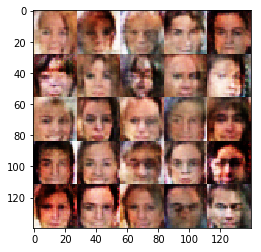

Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 0.5407
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 1.0504
Epoch 1/1... Discriminator Loss: 0.5489... Generator Loss: 1.7836
Epoch 1/1... Discriminator Loss: 1.2197... Generator Loss: 0.5553
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.8083
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 1.6146
Epoch 1/1... Discriminator Loss: 1.0126... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 0.7858... Generator Loss: 1.6321
Epoch 1/1... Discriminator Loss: 1.1028... Generator Loss: 1.0966
Epoch 1/1... Discriminator Loss: 1.1747... Generator Loss: 1.1130


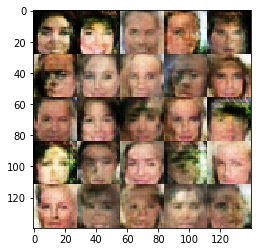

Epoch 1/1... Discriminator Loss: 1.4055... Generator Loss: 1.0971
Epoch 1/1... Discriminator Loss: 0.8688... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.9921
Epoch 1/1... Discriminator Loss: 1.2828... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 0.9716... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 1.2379
Epoch 1/1... Discriminator Loss: 1.2054... Generator Loss: 1.1594
Epoch 1/1... Discriminator Loss: 1.3108... Generator Loss: 0.6674
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.9733


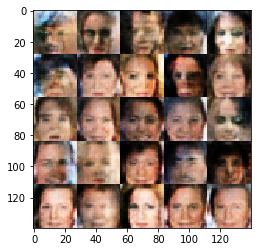

Epoch 1/1... Discriminator Loss: 0.7111... Generator Loss: 1.7248
Epoch 1/1... Discriminator Loss: 1.5555... Generator Loss: 0.6183
Epoch 1/1... Discriminator Loss: 1.1074... Generator Loss: 1.0006
Epoch 1/1... Discriminator Loss: 1.1885... Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 1.5137... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6241
Epoch 1/1... Discriminator Loss: 1.1940... Generator Loss: 1.1973
Epoch 1/1... Discriminator Loss: 0.9789... Generator Loss: 0.8222
Epoch 1/1... Discriminator Loss: 1.2190... Generator Loss: 0.5856
Epoch 1/1... Discriminator Loss: 1.3842... Generator Loss: 0.7699


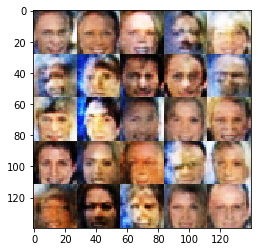

Epoch 1/1... Discriminator Loss: 1.1661... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 1.1556... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.9241
Epoch 1/1... Discriminator Loss: 1.2466... Generator Loss: 1.2264
Epoch 1/1... Discriminator Loss: 0.9817... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 0.7181... Generator Loss: 1.4880
Epoch 1/1... Discriminator Loss: 0.8040... Generator Loss: 1.6240
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 1.0205
Epoch 1/1... Discriminator Loss: 1.0713... Generator Loss: 1.0421


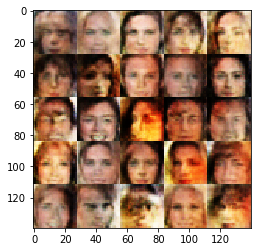

Epoch 1/1... Discriminator Loss: 1.0110... Generator Loss: 1.7944
Epoch 1/1... Discriminator Loss: 1.2728... Generator Loss: 0.7936
Epoch 1/1... Discriminator Loss: 1.4902... Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 1.6172... Generator Loss: 0.6866
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 1.4923
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 1.0555
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 0.8693
Epoch 1/1... Discriminator Loss: 1.4508... Generator Loss: 0.4444
Epoch 1/1... Discriminator Loss: 0.6779... Generator Loss: 1.3521


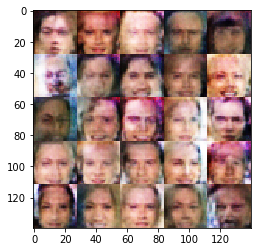

Epoch 1/1... Discriminator Loss: 1.1376... Generator Loss: 1.3142
Epoch 1/1... Discriminator Loss: 1.2047... Generator Loss: 0.7849
Epoch 1/1... Discriminator Loss: 1.0258... Generator Loss: 1.1360
Epoch 1/1... Discriminator Loss: 0.9077... Generator Loss: 1.6350
Epoch 1/1... Discriminator Loss: 0.8748... Generator Loss: 1.5599
Epoch 1/1... Discriminator Loss: 1.2806... Generator Loss: 0.5379
Epoch 1/1... Discriminator Loss: 0.8311... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.0736... Generator Loss: 0.8943
Epoch 1/1... Discriminator Loss: 1.5190... Generator Loss: 1.2862
Epoch 1/1... Discriminator Loss: 1.4996... Generator Loss: 0.8502


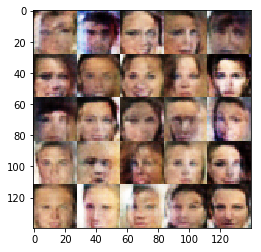

Epoch 1/1... Discriminator Loss: 1.0733... Generator Loss: 1.3340
Epoch 1/1... Discriminator Loss: 1.1260... Generator Loss: 1.1133
Epoch 1/1... Discriminator Loss: 1.2339... Generator Loss: 1.1382
Epoch 1/1... Discriminator Loss: 1.1788... Generator Loss: 0.9128
Epoch 1/1... Discriminator Loss: 1.4361... Generator Loss: 2.0079
Epoch 1/1... Discriminator Loss: 1.3153... Generator Loss: 1.3533
Epoch 1/1... Discriminator Loss: 0.9349... Generator Loss: 0.7891
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.7131
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 0.6510
Epoch 1/1... Discriminator Loss: 0.9363... Generator Loss: 0.9239


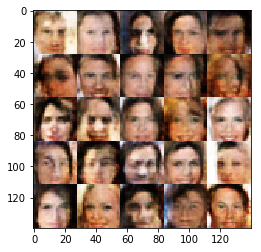

Epoch 1/1... Discriminator Loss: 1.0017... Generator Loss: 1.1071
Epoch 1/1... Discriminator Loss: 1.1102... Generator Loss: 0.9232
Epoch 1/1... Discriminator Loss: 1.5217... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 1.4593
Epoch 1/1... Discriminator Loss: 1.1306... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.1007... Generator Loss: 0.5749
Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 1.4687
Epoch 1/1... Discriminator Loss: 0.9779... Generator Loss: 1.3336
Epoch 1/1... Discriminator Loss: 1.1916... Generator Loss: 1.2549
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 1.4845


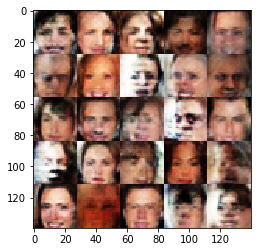

Epoch 1/1... Discriminator Loss: 0.7721... Generator Loss: 1.4806
Epoch 1/1... Discriminator Loss: 0.9237... Generator Loss: 1.2656
Epoch 1/1... Discriminator Loss: 1.4243... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 1.2073... Generator Loss: 1.2508
Epoch 1/1... Discriminator Loss: 0.8653... Generator Loss: 1.5785
Epoch 1/1... Discriminator Loss: 1.3513... Generator Loss: 1.0222
Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 0.6269
Epoch 1/1... Discriminator Loss: 0.9726... Generator Loss: 1.3797
Epoch 1/1... Discriminator Loss: 1.0348... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 1.4297... Generator Loss: 0.5269


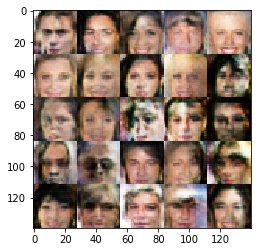

Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 1.2343
Epoch 1/1... Discriminator Loss: 1.1679... Generator Loss: 1.4222
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 1.4248
Epoch 1/1... Discriminator Loss: 1.0642... Generator Loss: 1.7747
Epoch 1/1... Discriminator Loss: 1.2887... Generator Loss: 0.6445
Epoch 1/1... Discriminator Loss: 1.1639... Generator Loss: 1.0554
Epoch 1/1... Discriminator Loss: 1.0458... Generator Loss: 1.5598
Epoch 1/1... Discriminator Loss: 1.4290... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 0.9799
Epoch 1/1... Discriminator Loss: 1.1499... Generator Loss: 1.3745


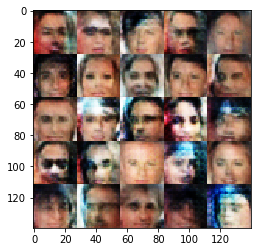

Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.9152
Epoch 1/1... Discriminator Loss: 1.4208... Generator Loss: 0.5839
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.7453
Epoch 1/1... Discriminator Loss: 1.0130... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 0.8933
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 1.0193
Epoch 1/1... Discriminator Loss: 0.9068... Generator Loss: 1.5078
Epoch 1/1... Discriminator Loss: 1.0264... Generator Loss: 0.9243
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 1.0170
Epoch 1/1... Discriminator Loss: 1.0562... Generator Loss: 1.4090


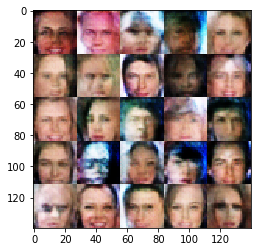

Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.2679... Generator Loss: 0.9078
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 1.0222
Epoch 1/1... Discriminator Loss: 0.8807... Generator Loss: 0.9982
Epoch 1/1... Discriminator Loss: 0.9055... Generator Loss: 1.5660
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 1.1308
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 1.5181
Epoch 1/1... Discriminator Loss: 0.9880... Generator Loss: 1.3144
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 2.2315
Epoch 1/1... Discriminator Loss: 1.7261... Generator Loss: 0.3969


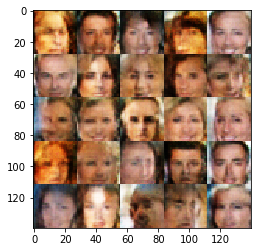

Epoch 1/1... Discriminator Loss: 1.5044... Generator Loss: 0.9713
Epoch 1/1... Discriminator Loss: 1.7184... Generator Loss: 0.4164
Epoch 1/1... Discriminator Loss: 0.9406... Generator Loss: 1.1963
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 1.3218
Epoch 1/1... Discriminator Loss: 1.0617... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 0.9606... Generator Loss: 1.8702
Epoch 1/1... Discriminator Loss: 0.8927... Generator Loss: 1.4932
Epoch 1/1... Discriminator Loss: 0.8937... Generator Loss: 2.4754
Epoch 1/1... Discriminator Loss: 1.5094... Generator Loss: 0.3867
Epoch 1/1... Discriminator Loss: 1.0566... Generator Loss: 0.6685


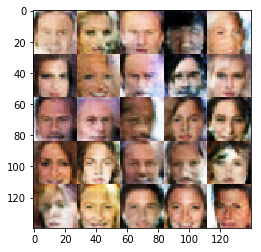

Epoch 1/1... Discriminator Loss: 1.0561... Generator Loss: 0.5733
Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 0.8955
Epoch 1/1... Discriminator Loss: 0.8978... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 1.3636
Epoch 1/1... Discriminator Loss: 1.3921... Generator Loss: 0.7817
Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 1.2791
Epoch 1/1... Discriminator Loss: 1.2032... Generator Loss: 0.6330
Epoch 1/1... Discriminator Loss: 1.0893... Generator Loss: 1.4762
Epoch 1/1... Discriminator Loss: 0.8499... Generator Loss: 1.2784
Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.6344


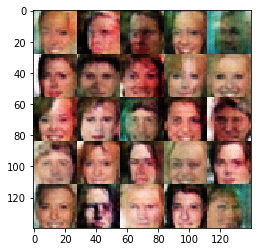

Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.5023
Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 0.4921
Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 0.5845
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 1.2468
Epoch 1/1... Discriminator Loss: 0.7621... Generator Loss: 1.2961
Epoch 1/1... Discriminator Loss: 1.6933... Generator Loss: 0.4734
Epoch 1/1... Discriminator Loss: 0.8036... Generator Loss: 1.1410
Epoch 1/1... Discriminator Loss: 1.2346... Generator Loss: 2.6968
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 2.0757


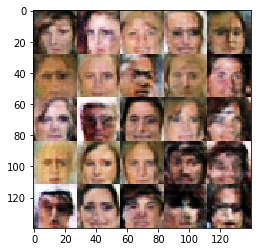

Epoch 1/1... Discriminator Loss: 1.0981... Generator Loss: 1.0100
Epoch 1/1... Discriminator Loss: 1.1581... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 1.4165... Generator Loss: 1.0724
Epoch 1/1... Discriminator Loss: 0.6091... Generator Loss: 1.4293
Epoch 1/1... Discriminator Loss: 0.8801... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.7443... Generator Loss: 0.4933
Epoch 1/1... Discriminator Loss: 1.0172... Generator Loss: 1.4972
Epoch 1/1... Discriminator Loss: 0.9222... Generator Loss: 1.0108
Epoch 1/1... Discriminator Loss: 0.8954... Generator Loss: 1.0070
Epoch 1/1... Discriminator Loss: 0.7911... Generator Loss: 1.2006


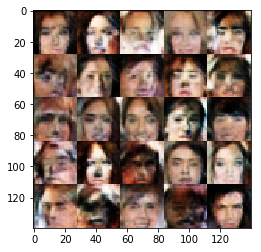

Epoch 1/1... Discriminator Loss: 1.1250... Generator Loss: 1.2514
Epoch 1/1... Discriminator Loss: 0.7488... Generator Loss: 1.3977
Epoch 1/1... Discriminator Loss: 1.5672... Generator Loss: 0.9990
Epoch 1/1... Discriminator Loss: 0.9458... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 1.3465... Generator Loss: 0.5116
Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 0.9818
Epoch 1/1... Discriminator Loss: 1.0583... Generator Loss: 1.0928
Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 0.9079
Epoch 1/1... Discriminator Loss: 1.1278... Generator Loss: 1.5969
Epoch 1/1... Discriminator Loss: 1.0137... Generator Loss: 1.4057


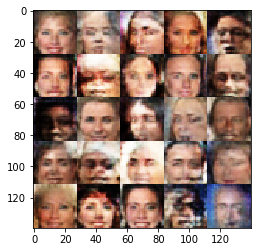

Epoch 1/1... Discriminator Loss: 0.9251... Generator Loss: 1.0089
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 0.4559
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.1170... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 0.8150... Generator Loss: 1.6146
Epoch 1/1... Discriminator Loss: 1.8147... Generator Loss: 0.4098
Epoch 1/1... Discriminator Loss: 1.5540... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 0.6186... Generator Loss: 1.7573
Epoch 1/1... Discriminator Loss: 1.9526... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.2256... Generator Loss: 0.7750


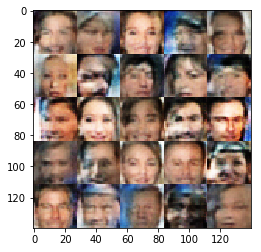

Epoch 1/1... Discriminator Loss: 1.9213... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 1.0738... Generator Loss: 1.1252
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 1.2640
Epoch 1/1... Discriminator Loss: 0.8765... Generator Loss: 1.2341
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.3268... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 1.0524... Generator Loss: 1.0553
Epoch 1/1... Discriminator Loss: 1.4325... Generator Loss: 2.5496
Epoch 1/1... Discriminator Loss: 1.0647... Generator Loss: 1.0446


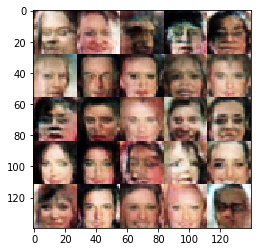

Epoch 1/1... Discriminator Loss: 1.0392... Generator Loss: 0.8283
Epoch 1/1... Discriminator Loss: 0.9979... Generator Loss: 0.8337
Epoch 1/1... Discriminator Loss: 0.8298... Generator Loss: 1.3283
Epoch 1/1... Discriminator Loss: 1.1028... Generator Loss: 0.8357
Epoch 1/1... Discriminator Loss: 0.7944... Generator Loss: 1.1504
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 1.2067
Epoch 1/1... Discriminator Loss: 1.0351... Generator Loss: 0.9648
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 1.1927
Epoch 1/1... Discriminator Loss: 0.9134... Generator Loss: 1.2264
Epoch 1/1... Discriminator Loss: 0.7949... Generator Loss: 1.2832


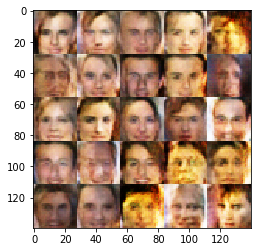

Epoch 1/1... Discriminator Loss: 0.8563... Generator Loss: 1.9061
Epoch 1/1... Discriminator Loss: 0.9378... Generator Loss: 1.7454
Epoch 1/1... Discriminator Loss: 1.4568... Generator Loss: 0.5234
Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 0.9178
Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 1.0723
Epoch 1/1... Discriminator Loss: 1.9146... Generator Loss: 0.3807
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 0.9679
Epoch 1/1... Discriminator Loss: 1.4349... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.0228... Generator Loss: 1.1128
Epoch 1/1... Discriminator Loss: 1.1256... Generator Loss: 0.7737


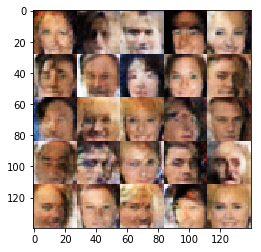

Epoch 1/1... Discriminator Loss: 1.0032... Generator Loss: 1.8204
Epoch 1/1... Discriminator Loss: 1.7942... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 0.9837... Generator Loss: 1.7924
Epoch 1/1... Discriminator Loss: 0.8669... Generator Loss: 1.2733
Epoch 1/1... Discriminator Loss: 1.2568... Generator Loss: 0.4727
Epoch 1/1... Discriminator Loss: 0.9865... Generator Loss: 1.6969
Epoch 1/1... Discriminator Loss: 1.1974... Generator Loss: 1.2262
Epoch 1/1... Discriminator Loss: 0.9921... Generator Loss: 1.2016
Epoch 1/1... Discriminator Loss: 0.6926... Generator Loss: 1.2408


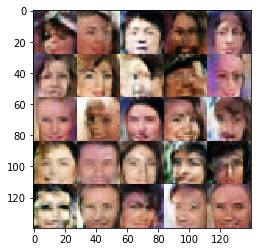

Epoch 1/1... Discriminator Loss: 1.1623... Generator Loss: 1.1285
Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 0.9028
Epoch 1/1... Discriminator Loss: 1.1203... Generator Loss: 1.0940
Epoch 1/1... Discriminator Loss: 1.9056... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 0.8989... Generator Loss: 1.8935
Epoch 1/1... Discriminator Loss: 1.1016... Generator Loss: 1.3722
Epoch 1/1... Discriminator Loss: 1.1486... Generator Loss: 1.2455
Epoch 1/1... Discriminator Loss: 1.3340... Generator Loss: 1.0821
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 1.0551
Epoch 1/1... Discriminator Loss: 0.9045... Generator Loss: 0.6760


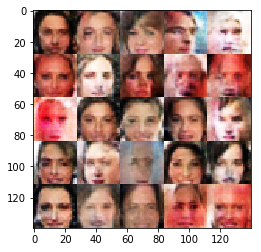

Epoch 1/1... Discriminator Loss: 1.4259... Generator Loss: 1.0047
Epoch 1/1... Discriminator Loss: 0.6960... Generator Loss: 1.1533
Epoch 1/1... Discriminator Loss: 1.0064... Generator Loss: 1.1948
Epoch 1/1... Discriminator Loss: 0.8503... Generator Loss: 0.8772
Epoch 1/1... Discriminator Loss: 0.7992... Generator Loss: 1.6661
Epoch 1/1... Discriminator Loss: 0.9593... Generator Loss: 0.8838
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 1.2804
Epoch 1/1... Discriminator Loss: 1.0760... Generator Loss: 1.0492
Epoch 1/1... Discriminator Loss: 0.7858... Generator Loss: 1.5352
Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 1.0510


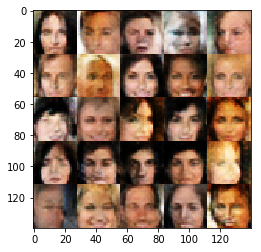

Epoch 1/1... Discriminator Loss: 1.5805... Generator Loss: 0.8515
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 0.7674
Epoch 1/1... Discriminator Loss: 1.4469... Generator Loss: 0.7221
Epoch 1/1... Discriminator Loss: 1.6842... Generator Loss: 0.5240
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.9604
Epoch 1/1... Discriminator Loss: 1.2851... Generator Loss: 0.6028
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.8529
Epoch 1/1... Discriminator Loss: 0.9211... Generator Loss: 1.1660
Epoch 1/1... Discriminator Loss: 1.6695... Generator Loss: 1.2629
Epoch 1/1... Discriminator Loss: 1.1725... Generator Loss: 1.8463


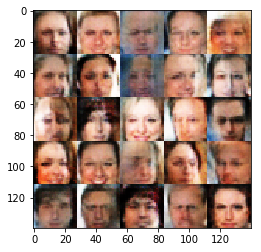

Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.9581
Epoch 1/1... Discriminator Loss: 1.0486... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 0.7734... Generator Loss: 1.4450
Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 1.1746
Epoch 1/1... Discriminator Loss: 0.9385... Generator Loss: 1.4172
Epoch 1/1... Discriminator Loss: 0.7764... Generator Loss: 0.8272
Epoch 1/1... Discriminator Loss: 1.1191... Generator Loss: 0.9694
Epoch 1/1... Discriminator Loss: 1.0531... Generator Loss: 0.8464
Epoch 1/1... Discriminator Loss: 0.7482... Generator Loss: 1.3064


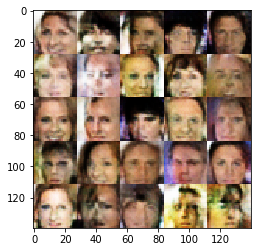

Epoch 1/1... Discriminator Loss: 0.8668... Generator Loss: 1.1417
Epoch 1/1... Discriminator Loss: 1.0551... Generator Loss: 1.6183
Epoch 1/1... Discriminator Loss: 1.0658... Generator Loss: 1.5786
Epoch 1/1... Discriminator Loss: 0.9821... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 0.7710... Generator Loss: 1.6982
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 1.0120
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 0.6095
Epoch 1/1... Discriminator Loss: 0.9510... Generator Loss: 2.4229
Epoch 1/1... Discriminator Loss: 1.7372... Generator Loss: 0.8847
Epoch 1/1... Discriminator Loss: 1.0725... Generator Loss: 1.1930


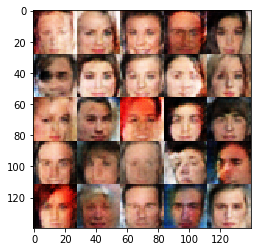

Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 1.7975
Epoch 1/1... Discriminator Loss: 1.1662... Generator Loss: 1.1922
Epoch 1/1... Discriminator Loss: 1.0396... Generator Loss: 1.2148
Epoch 1/1... Discriminator Loss: 1.1337... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 0.9228... Generator Loss: 1.0575
Epoch 1/1... Discriminator Loss: 1.5543... Generator Loss: 2.0329
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 0.8730
Epoch 1/1... Discriminator Loss: 1.8183... Generator Loss: 0.3298
Epoch 1/1... Discriminator Loss: 1.6569... Generator Loss: 0.5010
Epoch 1/1... Discriminator Loss: 1.2183... Generator Loss: 2.1675


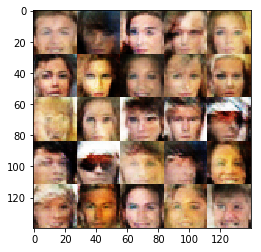

Epoch 1/1... Discriminator Loss: 0.9147... Generator Loss: 1.0184
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 1.1587
Epoch 1/1... Discriminator Loss: 1.1403... Generator Loss: 1.4186
Epoch 1/1... Discriminator Loss: 1.6468... Generator Loss: 1.1585
Epoch 1/1... Discriminator Loss: 1.2128... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 0.9148... Generator Loss: 0.9855
Epoch 1/1... Discriminator Loss: 1.0862... Generator Loss: 1.1892
Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 1.1139
Epoch 1/1... Discriminator Loss: 0.6690... Generator Loss: 1.0552
Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 0.8070


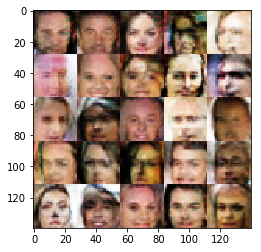

Epoch 1/1... Discriminator Loss: 0.9623... Generator Loss: 1.0152
Epoch 1/1... Discriminator Loss: 1.5213... Generator Loss: 0.8705
Epoch 1/1... Discriminator Loss: 1.2941... Generator Loss: 0.7924
Epoch 1/1... Discriminator Loss: 1.0007... Generator Loss: 1.2128
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 1.1731
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 1.0343
Epoch 1/1... Discriminator Loss: 0.8044... Generator Loss: 1.1622
Epoch 1/1... Discriminator Loss: 0.8959... Generator Loss: 1.2070
Epoch 1/1... Discriminator Loss: 0.7983... Generator Loss: 1.1578
Epoch 1/1... Discriminator Loss: 1.2357... Generator Loss: 0.8022


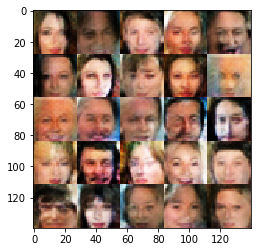

Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.2599... Generator Loss: 1.1732
Epoch 1/1... Discriminator Loss: 1.5617... Generator Loss: 0.8288
Epoch 1/1... Discriminator Loss: 1.4134... Generator Loss: 0.8301
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.3668
Epoch 1/1... Discriminator Loss: 0.9514... Generator Loss: 0.8762
Epoch 1/1... Discriminator Loss: 1.0776... Generator Loss: 1.2541
Epoch 1/1... Discriminator Loss: 1.0395... Generator Loss: 0.7304
Epoch 1/1... Discriminator Loss: 1.1603... Generator Loss: 1.2907
Epoch 1/1... Discriminator Loss: 1.8182... Generator Loss: 0.9548


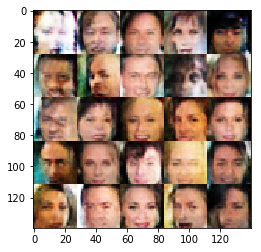

Epoch 1/1... Discriminator Loss: 1.1833... Generator Loss: 0.8787
Epoch 1/1... Discriminator Loss: 1.8278... Generator Loss: 0.2541
Epoch 1/1... Discriminator Loss: 1.7531... Generator Loss: 0.5552
Epoch 1/1... Discriminator Loss: 0.8842... Generator Loss: 1.4268
Epoch 1/1... Discriminator Loss: 0.7042... Generator Loss: 1.4955
Epoch 1/1... Discriminator Loss: 0.9847... Generator Loss: 1.5582
Epoch 1/1... Discriminator Loss: 0.7213... Generator Loss: 1.3917
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 1.4804
Epoch 1/1... Discriminator Loss: 1.6154... Generator Loss: 0.9642
Epoch 1/1... Discriminator Loss: 1.5214... Generator Loss: 0.8024


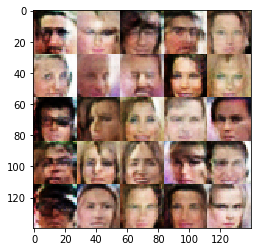

Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.5776
Epoch 1/1... Discriminator Loss: 1.0573... Generator Loss: 1.6261
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 1.2059
Epoch 1/1... Discriminator Loss: 1.4145... Generator Loss: 0.8942
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 1.5890
Epoch 1/1... Discriminator Loss: 0.6798... Generator Loss: 1.8551
Epoch 1/1... Discriminator Loss: 0.9059... Generator Loss: 1.6226
Epoch 1/1... Discriminator Loss: 0.9578... Generator Loss: 1.2186
Epoch 1/1... Discriminator Loss: 1.1433... Generator Loss: 1.1296
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 0.9375


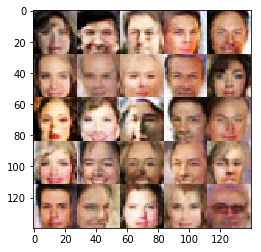

Epoch 1/1... Discriminator Loss: 1.1143... Generator Loss: 1.4299
Epoch 1/1... Discriminator Loss: 0.8679... Generator Loss: 1.5231
Epoch 1/1... Discriminator Loss: 1.7898... Generator Loss: 0.5535
Epoch 1/1... Discriminator Loss: 1.0779... Generator Loss: 1.2652
Epoch 1/1... Discriminator Loss: 0.8925... Generator Loss: 2.2235
Epoch 1/1... Discriminator Loss: 0.6188... Generator Loss: 1.5778
Epoch 1/1... Discriminator Loss: 0.9339... Generator Loss: 1.0574
Epoch 1/1... Discriminator Loss: 1.0266... Generator Loss: 1.6592
Epoch 1/1... Discriminator Loss: 0.9394... Generator Loss: 1.4700
Epoch 1/1... Discriminator Loss: 0.4468... Generator Loss: 2.5082


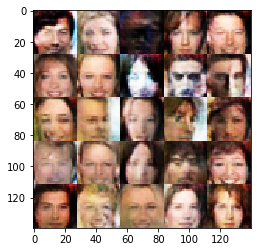

Epoch 1/1... Discriminator Loss: 2.1935... Generator Loss: 0.2315
Epoch 1/1... Discriminator Loss: 0.7524... Generator Loss: 1.3886
Epoch 1/1... Discriminator Loss: 1.2905... Generator Loss: 0.8654
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 0.7655... Generator Loss: 1.0760
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 1.0070
Epoch 1/1... Discriminator Loss: 1.1171... Generator Loss: 1.3576
Epoch 1/1... Discriminator Loss: 0.8985... Generator Loss: 1.1651
Epoch 1/1... Discriminator Loss: 1.2781... Generator Loss: 0.6648


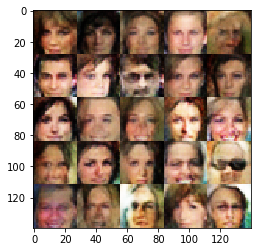

Epoch 1/1... Discriminator Loss: 0.7860... Generator Loss: 0.7965
Epoch 1/1... Discriminator Loss: 0.7570... Generator Loss: 2.4862
Epoch 1/1... Discriminator Loss: 1.2839... Generator Loss: 1.1217
Epoch 1/1... Discriminator Loss: 1.3047... Generator Loss: 0.6372
Epoch 1/1... Discriminator Loss: 1.4580... Generator Loss: 1.5345
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.4242
Epoch 1/1... Discriminator Loss: 1.3442... Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 0.7500... Generator Loss: 1.1982
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.4139
Epoch 1/1... Discriminator Loss: 1.4840... Generator Loss: 2.1172


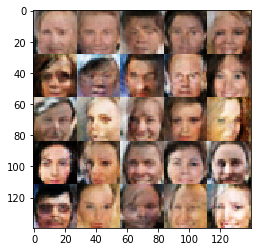

Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.9592
Epoch 1/1... Discriminator Loss: 1.5757... Generator Loss: 0.4270
Epoch 1/1... Discriminator Loss: 1.5420... Generator Loss: 0.9414
Epoch 1/1... Discriminator Loss: 1.1274... Generator Loss: 0.6152
Epoch 1/1... Discriminator Loss: 1.0285... Generator Loss: 0.9405
Epoch 1/1... Discriminator Loss: 1.7198... Generator Loss: 2.2961
Epoch 1/1... Discriminator Loss: 0.8839... Generator Loss: 1.1384
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 0.7423... Generator Loss: 1.3043
Epoch 1/1... Discriminator Loss: 0.9347... Generator Loss: 0.9840


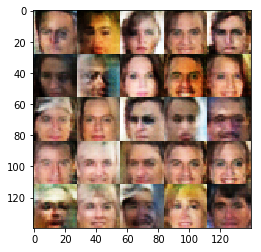

Epoch 1/1... Discriminator Loss: 0.7060... Generator Loss: 1.0925
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.8872
Epoch 1/1... Discriminator Loss: 0.9399... Generator Loss: 1.0637
Epoch 1/1... Discriminator Loss: 0.7537... Generator Loss: 2.0037
Epoch 1/1... Discriminator Loss: 1.1336... Generator Loss: 0.8970
Epoch 1/1... Discriminator Loss: 0.7298... Generator Loss: 1.2816
Epoch 1/1... Discriminator Loss: 1.0695... Generator Loss: 1.2064
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 0.5398
Epoch 1/1... Discriminator Loss: 1.4904... Generator Loss: 0.5234
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.8093


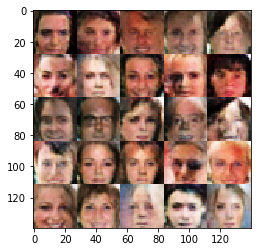

Epoch 1/1... Discriminator Loss: 1.5195... Generator Loss: 2.2920
Epoch 1/1... Discriminator Loss: 1.1897... Generator Loss: 1.1573
Epoch 1/1... Discriminator Loss: 2.4063... Generator Loss: 0.1892
Epoch 1/1... Discriminator Loss: 1.4728... Generator Loss: 0.3521
Epoch 1/1... Discriminator Loss: 2.2390... Generator Loss: 0.4006
Epoch 1/1... Discriminator Loss: 0.4870... Generator Loss: 1.5630
Epoch 1/1... Discriminator Loss: 0.8649... Generator Loss: 0.9750
Epoch 1/1... Discriminator Loss: 0.7223... Generator Loss: 1.4466
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.9078
Epoch 1/1... Discriminator Loss: 0.8764... Generator Loss: 1.1465


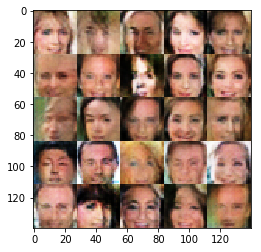

Epoch 1/1... Discriminator Loss: 0.5941... Generator Loss: 1.4571
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.7348
Epoch 1/1... Discriminator Loss: 0.6571... Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 0.8242... Generator Loss: 1.2079
Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.4100
Epoch 1/1... Discriminator Loss: 1.4105... Generator Loss: 1.0229
Epoch 1/1... Discriminator Loss: 0.8305... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 1.0778... Generator Loss: 0.9409
Epoch 1/1... Discriminator Loss: 1.0028... Generator Loss: 1.9475


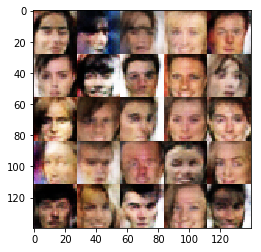

Epoch 1/1... Discriminator Loss: 1.2811... Generator Loss: 0.7013
Epoch 1/1... Discriminator Loss: 0.8677... Generator Loss: 1.2629
Epoch 1/1... Discriminator Loss: 0.8790... Generator Loss: 0.7713
Epoch 1/1... Discriminator Loss: 0.9145... Generator Loss: 1.1681
Epoch 1/1... Discriminator Loss: 1.1057... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.6511
Epoch 1/1... Discriminator Loss: 1.0333... Generator Loss: 1.5785
Epoch 1/1... Discriminator Loss: 1.5053... Generator Loss: 0.6945
Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 1.0157
Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 1.1205


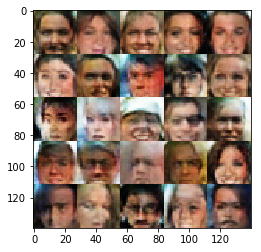

Epoch 1/1... Discriminator Loss: 1.3458... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 0.7302... Generator Loss: 1.1478
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 0.8385
Epoch 1/1... Discriminator Loss: 0.6217... Generator Loss: 1.4791
Epoch 1/1... Discriminator Loss: 0.4890... Generator Loss: 1.5094
Epoch 1/1... Discriminator Loss: 1.5740... Generator Loss: 0.6633
Epoch 1/1... Discriminator Loss: 0.8903... Generator Loss: 1.3663
Epoch 1/1... Discriminator Loss: 0.9307... Generator Loss: 1.0225
Epoch 1/1... Discriminator Loss: 1.2234... Generator Loss: 1.1329
Epoch 1/1... Discriminator Loss: 0.8995... Generator Loss: 1.2443


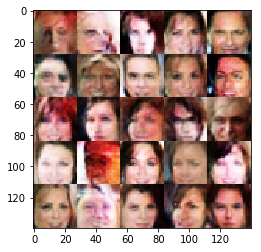

Epoch 1/1... Discriminator Loss: 0.7995... Generator Loss: 0.5781
Epoch 1/1... Discriminator Loss: 0.8794... Generator Loss: 1.4039
Epoch 1/1... Discriminator Loss: 0.6994... Generator Loss: 1.5802
Epoch 1/1... Discriminator Loss: 0.6444... Generator Loss: 1.7242
Epoch 1/1... Discriminator Loss: 0.6666... Generator Loss: 2.1324
Epoch 1/1... Discriminator Loss: 0.2879... Generator Loss: 2.5407
Epoch 1/1... Discriminator Loss: 0.9613... Generator Loss: 1.4170
Epoch 1/1... Discriminator Loss: 0.5630... Generator Loss: 1.7332
Epoch 1/1... Discriminator Loss: 0.7659... Generator Loss: 1.3318
Epoch 1/1... Discriminator Loss: 0.9578... Generator Loss: 1.5620


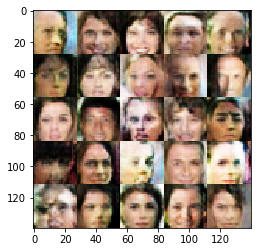

Epoch 1/1... Discriminator Loss: 1.2978... Generator Loss: 0.8565
Epoch 1/1... Discriminator Loss: 0.8005... Generator Loss: 0.3375
Epoch 1/1... Discriminator Loss: 0.5806... Generator Loss: 1.6604
Epoch 1/1... Discriminator Loss: 0.4835... Generator Loss: 2.3284
Epoch 1/1... Discriminator Loss: 1.0473... Generator Loss: 0.9283
Epoch 1/1... Discriminator Loss: 1.2635... Generator Loss: 0.4849
Epoch 1/1... Discriminator Loss: 0.8078... Generator Loss: 1.1158
Epoch 1/1... Discriminator Loss: 0.5749... Generator Loss: 1.5752
Epoch 1/1... Discriminator Loss: 0.6333... Generator Loss: 1.7244
Epoch 1/1... Discriminator Loss: 1.1947... Generator Loss: 0.6098


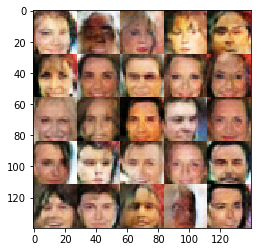

Epoch 1/1... Discriminator Loss: 0.3389... Generator Loss: 1.9724
Epoch 1/1... Discriminator Loss: 1.2168... Generator Loss: 0.9959
Epoch 1/1... Discriminator Loss: 0.9940... Generator Loss: 1.1080


In [36]:
# batch_size = None
# z_dim = None
# learning_rate = None
# beta1 = None
batch_size = 32 #32
z_dim = 200 #150
learning_rate = 0.0005
beta1 = 0.2

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

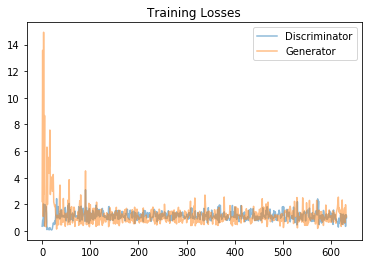

In [37]:
plt = pyplot
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.